In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
plt.style.use('seaborn')
plt.style.use('dark_background')

# Loading the dataset

In [193]:
population = pd.read_csv('Weights/population.csv')
moreThan50k = pd.read_csv('Weights/more_than_50k.csv')

# Handling population.csv file

## 1. Preprocessing

In [194]:
population.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


In [195]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

In [196]:
population.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


### 1.1 Replacing missing data with NaN

In [197]:
population.loc[8, 'GRINST']

' Not in universe'

In [198]:
for i in population.columns:
    if population[i].dtype != 'int64':
        population[i] = population[i].str.strip()

In [199]:
population.loc[8]

AAGE                                       47
ACLSWKR                      Local government
ADTIND                                     43
ADTOCC                                     26
AHGA               Some college but no degree
AHRSPAY                                   876
AHSCOL                        Not in universe
AMARITL       Married-civilian spouse present
AMJIND                              Education
AMJOCC         Adm support including clerical
ARACE                                   White
AREORGN                             All other
ASEX                                   Female
AUNMEM                                     No
AUNTYPE                       Not in universe
AWKSTAT                   Full-time schedules
CAPGAIN                                     0
CAPLOSS                                     0
DIVVAL                                      0
FILESTAT                  Joint both under 65
GRINREG                       Not in universe
GRINST                        Not 

In [200]:
population = population.replace('?', np.NaN)

In [201]:
columns = []
percentageOfNan = []
colsToRemove = []
for i in population.columns:
    columns.append(i)
    percentageOfNan.append(population[i].isnull().sum()*100/population.shape[0])
    if percentageOfNan[-1] > 40:
        colsToRemove.append(i)

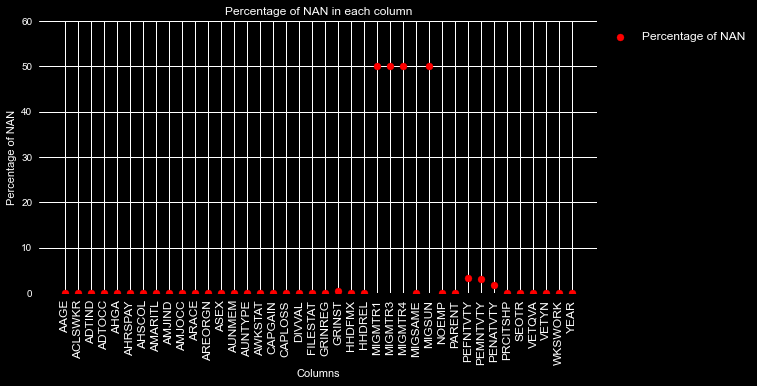

In [202]:
plt.figure(figsize=(10,5))
plt.scatter(columns, percentageOfNan, color='red', marker='o', label='Percentage of NAN')
plt.xticks(rotation=90, fontsize=12)
plt.ylim(0, 60, 10)
plt.xlabel('Columns')
plt.ylabel('Percentage of NAN')
plt.title('Percentage of NAN in each column')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()


In [203]:
len(population.columns)

40

In [204]:
colsToRemove

['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']

In [205]:
preprocessedPopulation = population.drop(colsToRemove, axis=1)

In [206]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

## 2. Feature Analysis

### 2.1 Histogram of values of each feature

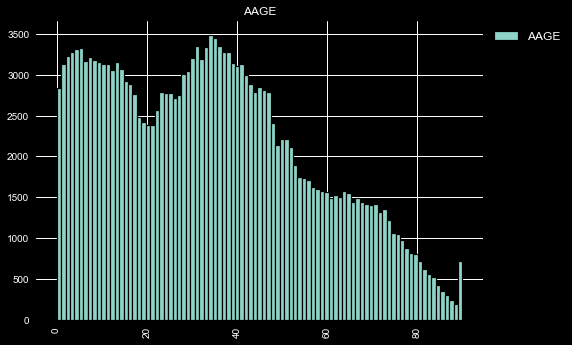

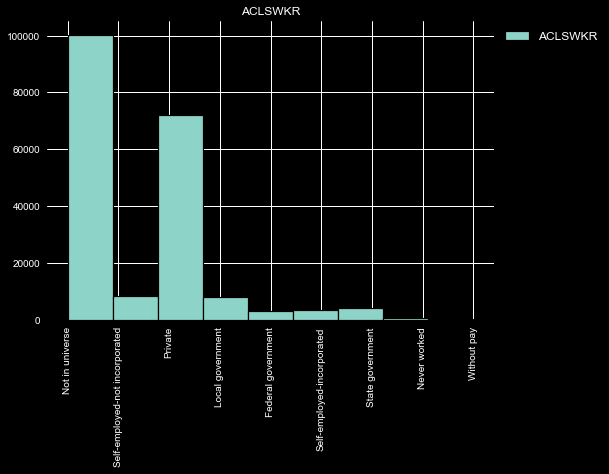

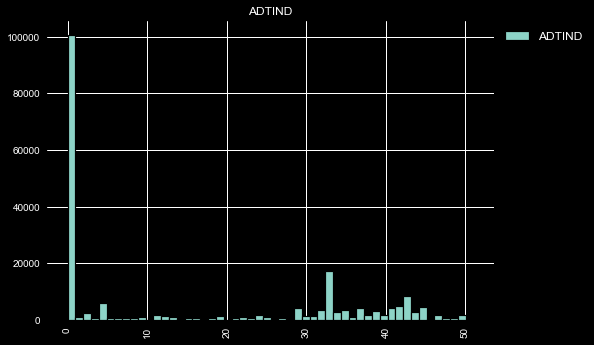

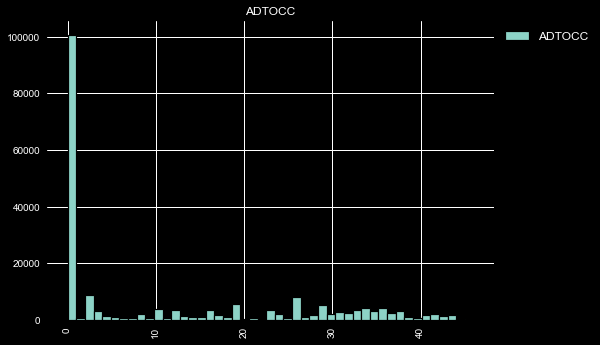

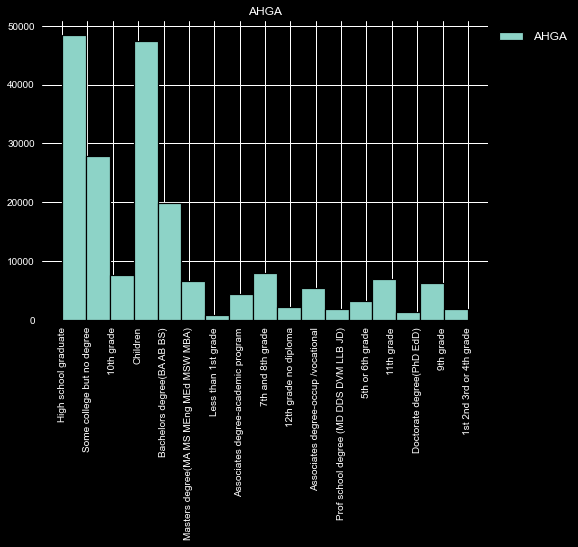

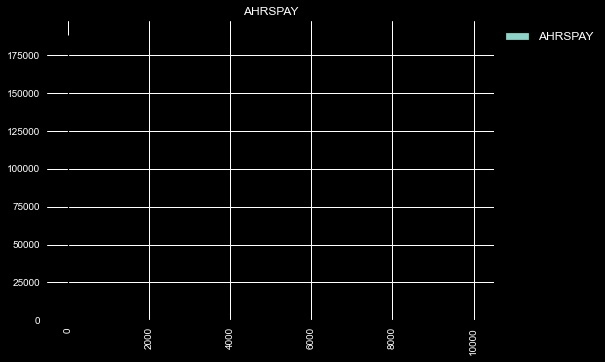

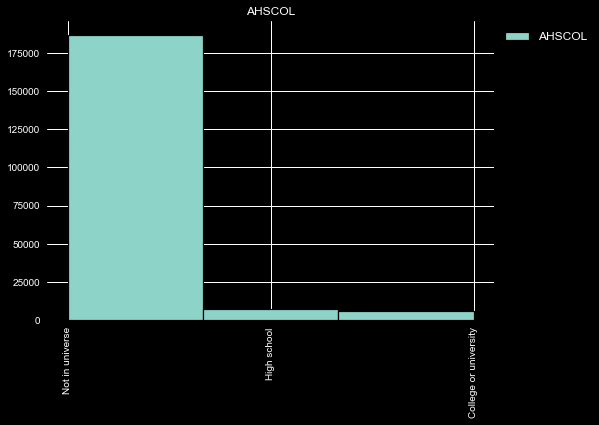

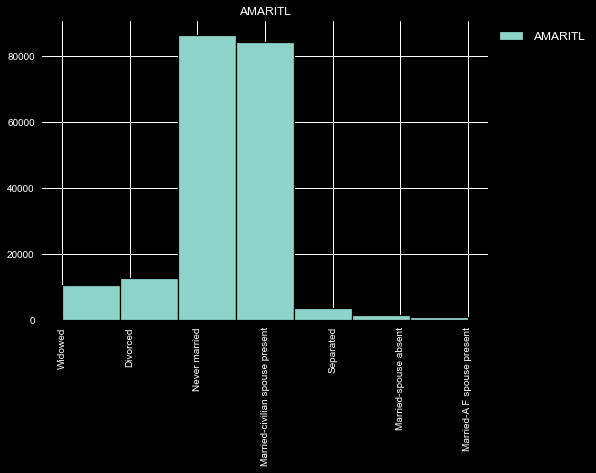

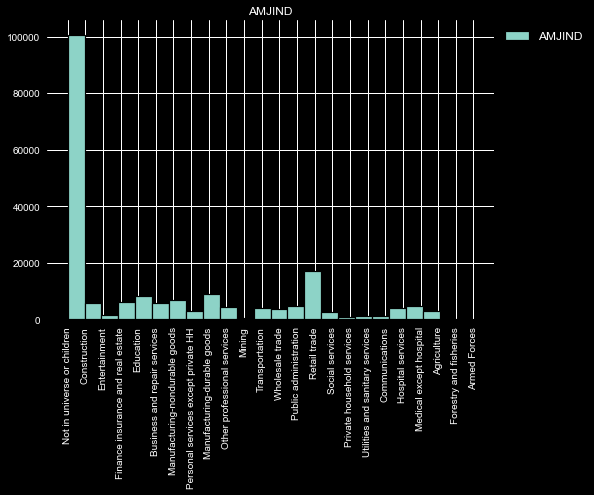

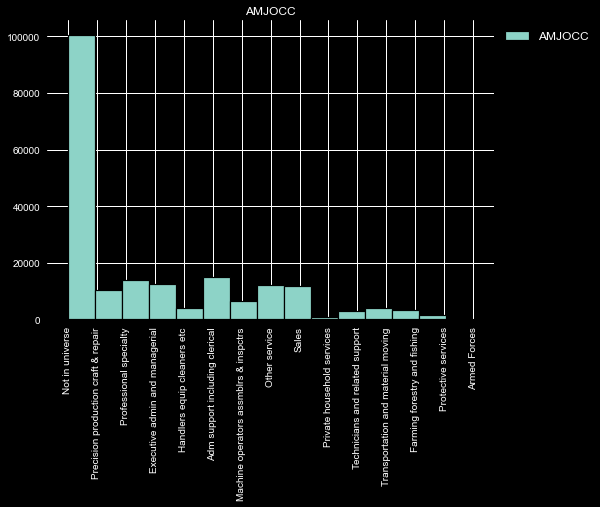

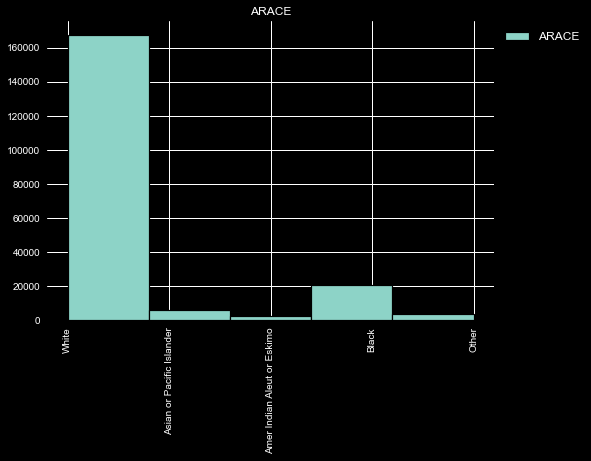

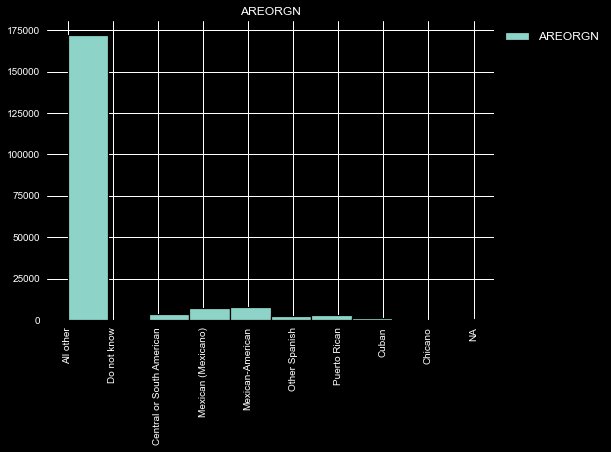

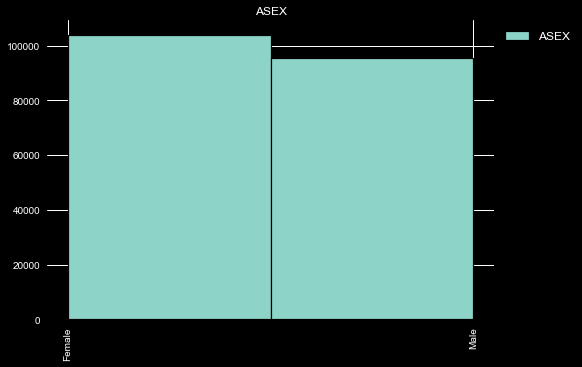

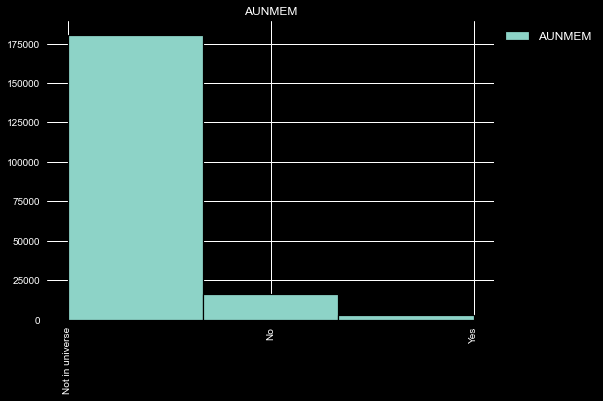

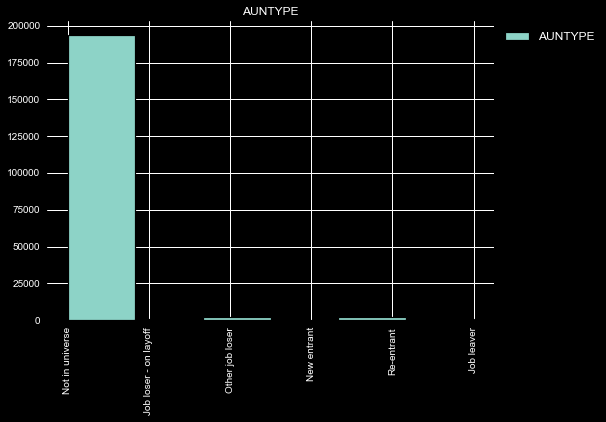

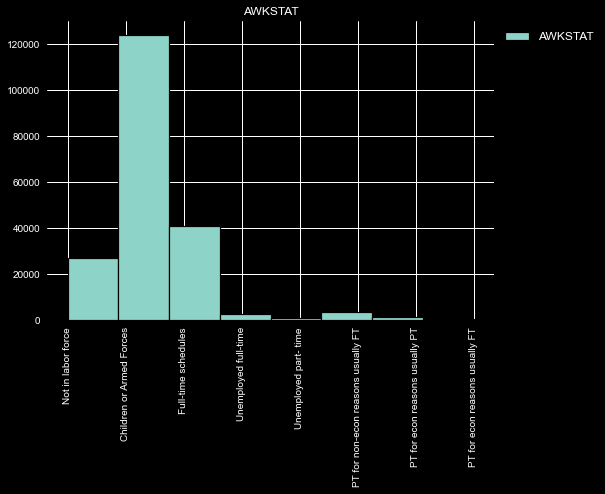

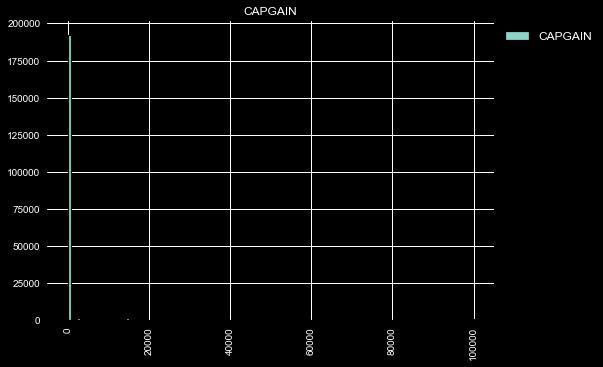

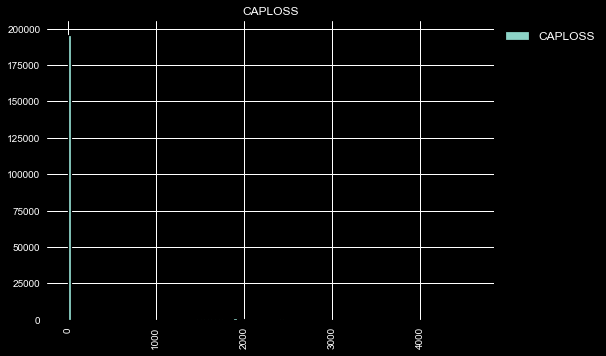

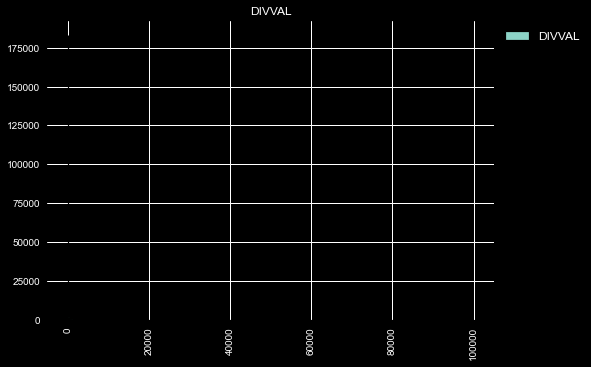

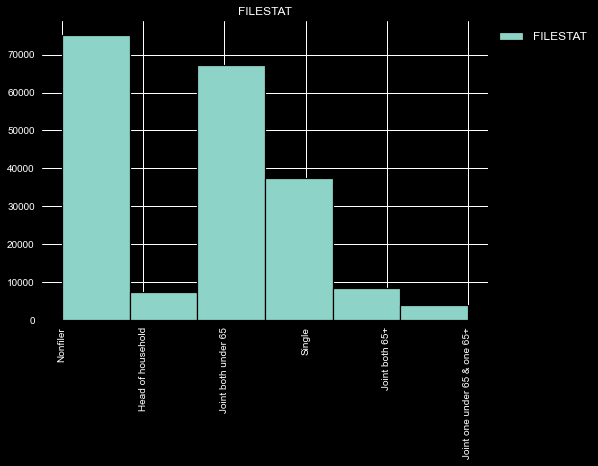

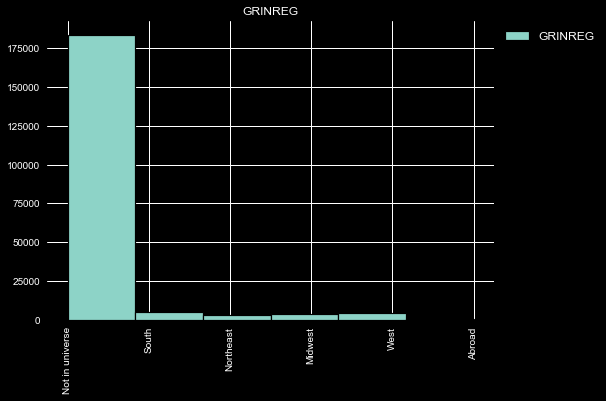

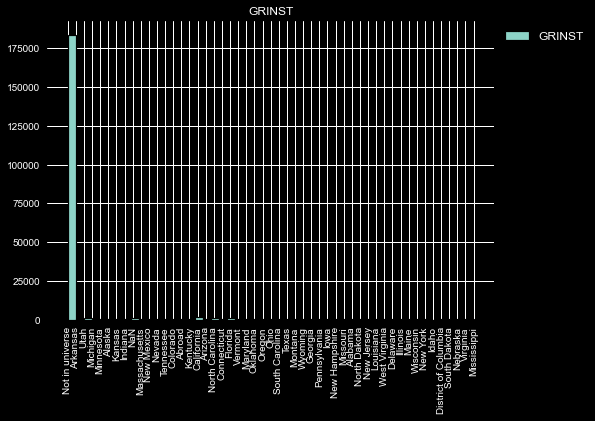

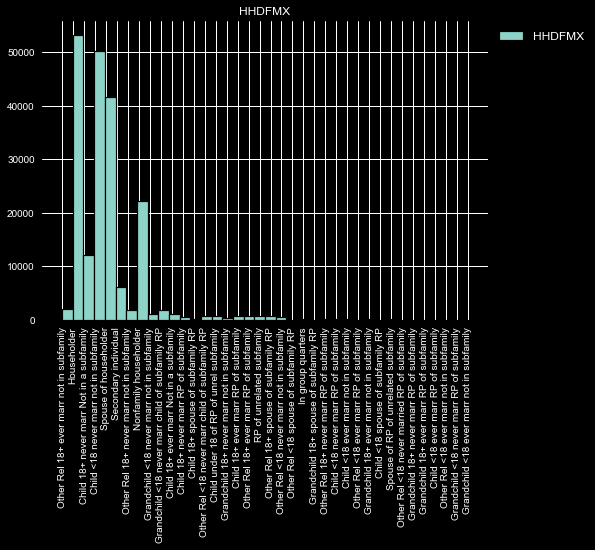

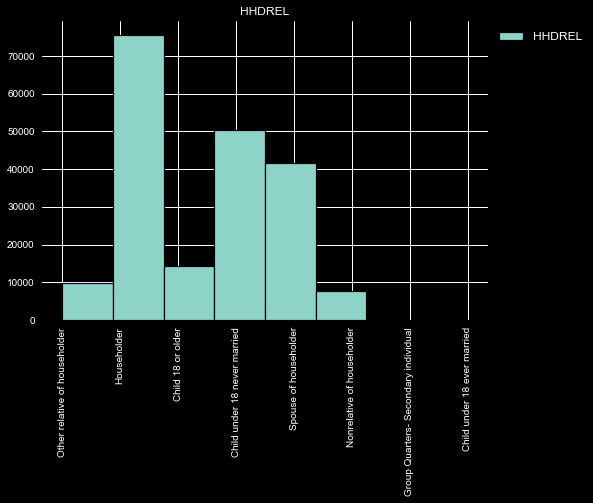

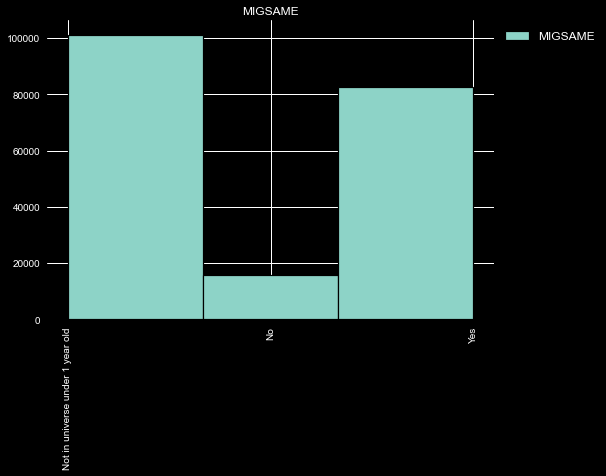

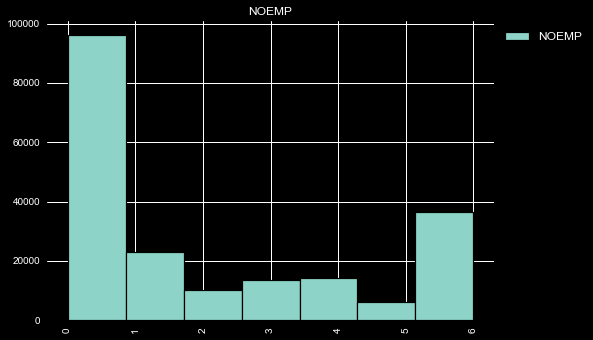

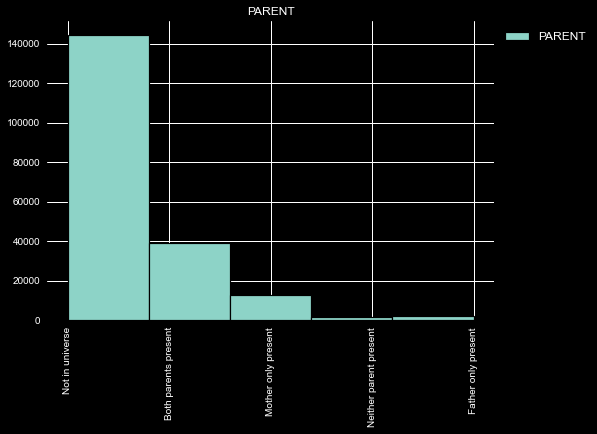

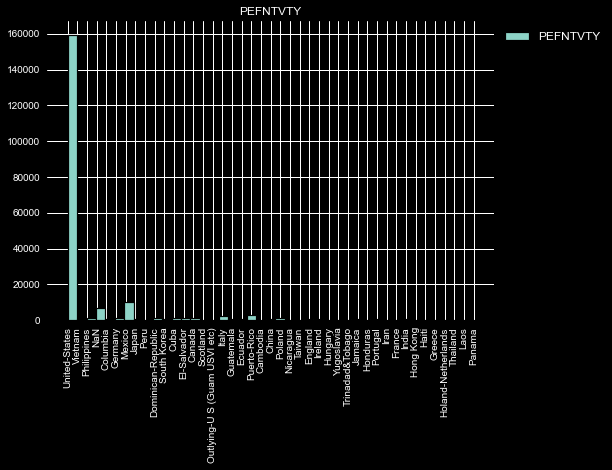

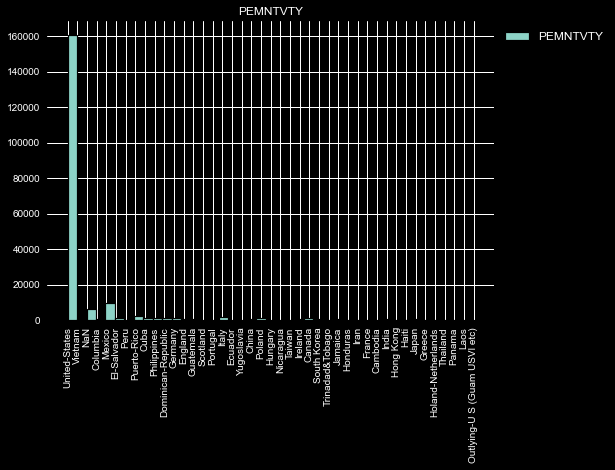

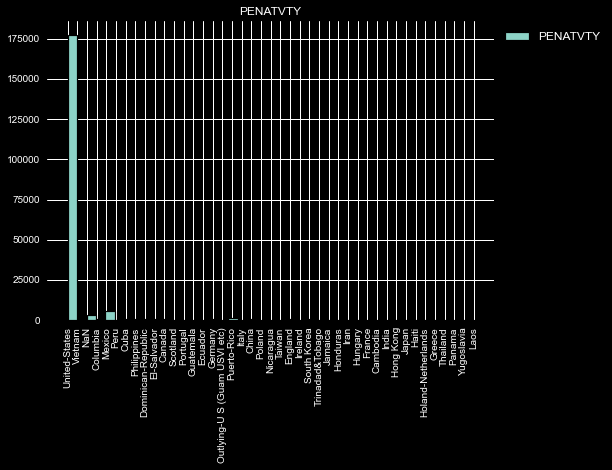

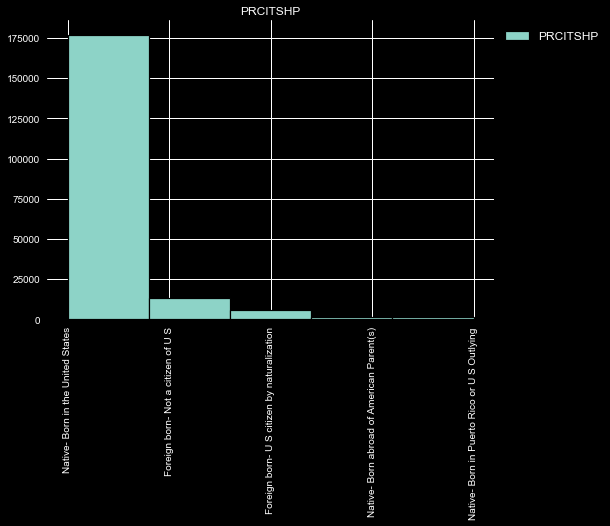

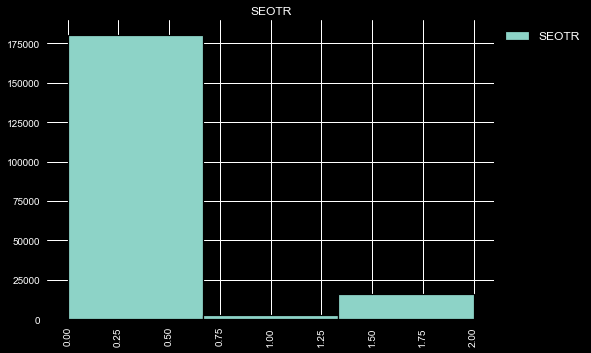

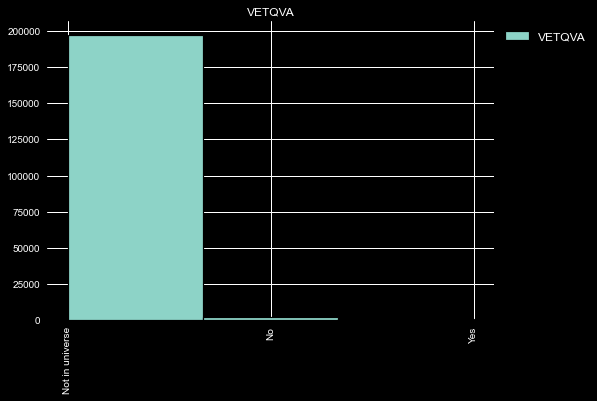

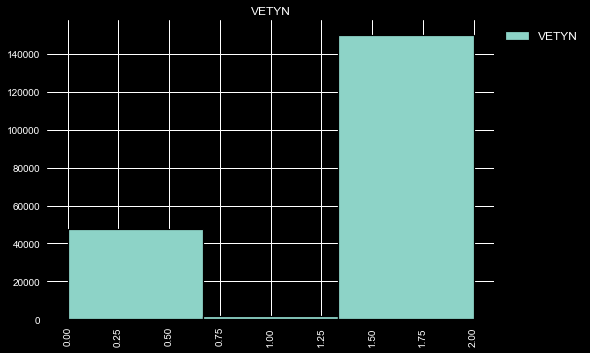

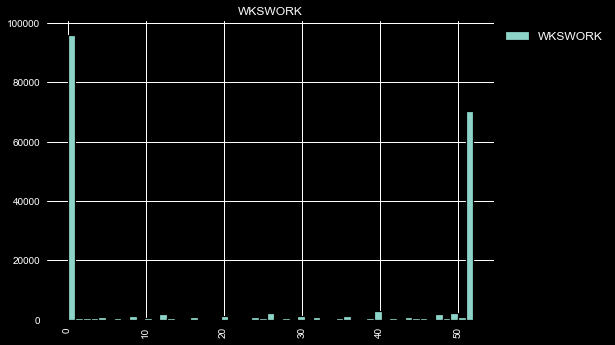

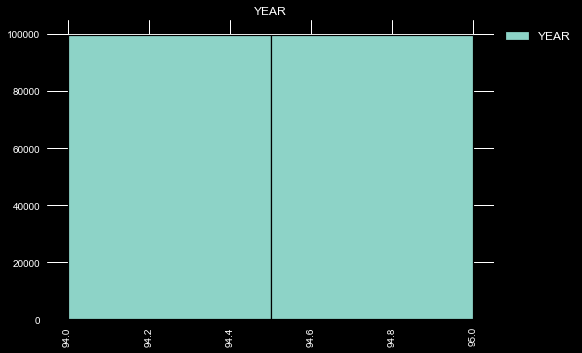

In [16]:
# fig = plt.figure(figsize=(40, 90))
# row = 4
# col = 9
# plotNo = 2
for j in range(len(preprocessedPopulation.columns)):
    # if plotNo == 10:
        # break
    # if i != 'GRINST' and i != 'PEFNTVTY' and i != 'PEMNTVTY' and i != 'PENATVTY':
    # print(i)
    i = preprocessedPopulation.columns[j]
    plt.hist(preprocessedPopulation[i].replace(np.NaN, 'NaN'), bins=len(preprocessedPopulation[i].unique()), label=i, edgecolor='black', linewidth=1.2, histtype='barstacked')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.title(i)
    # fig.add_subplot(col, row, plotNo)
    # plotNo += 1
    # col += 1
    # if col == 9:
    #     col = 0
    #     row += 1
    plt.show()


### 2.2 Removing the columns where one value dominates over other

In [207]:
imbalancedCols = []
for i in tqdm(range(len(preprocessedPopulation.columns))):
    col = preprocessedPopulation.columns[i]
    valCounts = list(preprocessedPopulation[col].value_counts().sort_values(ascending=False))
    if len(valCounts) == 1:
        imbalancedCols.append(col)
    elif valCounts[0] - valCounts[1] > 0.7*np.sum(valCounts):
        imbalancedCols.append(col)

100%|██████████| 36/36 [00:00<00:00, 39.95it/s]


In [208]:
imbalancedCols

['AHRSPAY',
 'AHSCOL',
 'ARACE',
 'AREORGN',
 'AUNMEM',
 'AUNTYPE',
 'CAPGAIN',
 'CAPLOSS',
 'DIVVAL',
 'GRINREG',
 'GRINST',
 'PEFNTVTY',
 'PEMNTVTY',
 'PENATVTY',
 'PRCITSHP',
 'SEOTR',
 'VETQVA']

In [209]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

In [210]:
preprocessedPopulation.drop(imbalancedCols, axis=1, inplace=True)


In [211]:
preprocessedPopulation.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND',
       'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME',
       'NOEMP', 'PARENT', 'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

## 3. Imputation, Bucketization and One Hot Encoding

### 3.1 Replacing missing data with mode

In [212]:
preprocessedPopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AMARITL   199523 non-null  object
 6   AMJIND    199523 non-null  object
 7   AMJOCC    199523 non-null  object
 8   ASEX      199523 non-null  object
 9   AWKSTAT   199523 non-null  object
 10  FILESTAT  199523 non-null  object
 11  HHDFMX    199523 non-null  object
 12  HHDREL    199523 non-null  object
 13  MIGSAME   199523 non-null  object
 14  NOEMP     199523 non-null  int64 
 15  PARENT    199523 non-null  object
 16  VETYN     199523 non-null  int64 
 17  WKSWORK   199523 non-null  int64 
 18  YEAR      199523 non-null  int64 
dtypes: int64(7), object(12)
memory usage: 28.9+ MB


In [213]:
globalModeDict = {}

In [214]:
for i in preprocessedPopulation.columns:
    globalModeDict[i] = preprocessedPopulation[i].mode()[0]

In [215]:
for i in preprocessedPopulation.columns:
    preprocessedPopulation[i] = preprocessedPopulation[i].replace(np.NaN, globalModeDict[i])

In [216]:
preprocessedPopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AMARITL   199523 non-null  object
 6   AMJIND    199523 non-null  object
 7   AMJOCC    199523 non-null  object
 8   ASEX      199523 non-null  object
 9   AWKSTAT   199523 non-null  object
 10  FILESTAT  199523 non-null  object
 11  HHDFMX    199523 non-null  object
 12  HHDREL    199523 non-null  object
 13  MIGSAME   199523 non-null  object
 14  NOEMP     199523 non-null  int64 
 15  PARENT    199523 non-null  object
 16  VETYN     199523 non-null  int64 
 17  WKSWORK   199523 non-null  int64 
 18  YEAR      199523 non-null  int64 
dtypes: int64(7), object(12)
memory usage: 28.9+ MB


### 3.2 Bucketization of the data

In [217]:
from sklearn.preprocessing import KBinsDiscretizer

In [174]:
kbd = KBinsDiscretizer(n_bins=5)

In [175]:
preprocessedPopulation.shape

(199523, 19)

In [176]:
numericalFeats = []
for i in preprocessedPopulation.columns:
    if preprocessedPopulation[i].dtype == 'int64':
        numericalFeats.append(i)

In [177]:
kbd = KBinsDiscretizer(n_bins=5, strategy='uniform')

In [178]:
binnedPopulation = kbd.fit_transform(preprocessedPopulation[numericalFeats])

In [179]:
binnedPopulation.shape

(199523, 35)

In [180]:
binnedPopulation[1]

<1x35 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [218]:
finalBuckets = {}

In [219]:
for i in preprocessedPopulation.columns:
    if preprocessedPopulation[i].dtype == 'int64' and len(preprocessedPopulation[i].unique()) > 6:
        finalbins = np.linspace(preprocessedPopulation[i].min(), preprocessedPopulation[i].max(), 6)
        finalBuckets[i] = finalbins
        finalLabels = []
        for j in range(0, len(finalbins)-1):
            # finalLabels.append((finalbins[j] + finalbins[j+1])/2)
            finalLabels.append(str(int(finalbins[j])) + '-' + str(int(finalbins[j+1])))
        preprocessedPopulation[i] = pd.cut(preprocessedPopulation[i], bins=finalbins, labels=finalLabels)

In [220]:
preprocessedPopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   AAGE      196684 non-null  category
 1   ACLSWKR   199523 non-null  object  
 2   ADTIND    98839 non-null   category
 3   ADTOCC    98839 non-null   category
 4   AHGA      199523 non-null  object  
 5   AMARITL   199523 non-null  object  
 6   AMJIND    199523 non-null  object  
 7   AMJOCC    199523 non-null  object  
 8   ASEX      199523 non-null  object  
 9   AWKSTAT   199523 non-null  object  
 10  FILESTAT  199523 non-null  object  
 11  HHDFMX    199523 non-null  object  
 12  HHDREL    199523 non-null  object  
 13  MIGSAME   199523 non-null  object  
 14  NOEMP     103540 non-null  category
 15  PARENT    199523 non-null  object  
 16  VETYN     199523 non-null  int64   
 17  WKSWORK   103540 non-null  category
 18  YEAR      199523 non-null  int64   
dtypes: category(5), int64(2

### 3.3 One Hot Encoding All the Features

In [221]:
from sklearn.preprocessing import OneHotEncoder

In [222]:
oht = OneHotEncoder(sparse=True)

In [223]:
# # temp = pd.get_dummies(preprocessedPopulation['AAGE'], sparse=True, drop_first=False
# # columns=preprocessedPopulation['AAGE'].unique()
# # )
# for i in preprocessedPopulation.columns:
#     preprocessedPopulation[i] = pd.get_dummies(preprocessedPopulation[i], sparse=True, drop_first=False)

In [224]:
preprocessedPopulation['AAGE'].value_counts()

0-18     55637
18-36    53032
36-54    47816
54-72    27390
72-90    12809
Name: AAGE, dtype: int64

In [225]:
preprocessedPopulation['AAGE']

0         72-90
1         54-72
2          0-18
3          0-18
4          0-18
          ...  
199518    72-90
199519    54-72
199520    36-54
199521     0-18
199522    18-36
Name: AAGE, Length: 199523, dtype: category
Categories (5, object): ['0-18' < '18-36' < '36-54' < '54-72' < '72-90']

In [226]:
finalPopulationData = pd.DataFrame()

In [227]:
oneHotColumns = {}

In [228]:
for itr in tqdm(range(len(preprocessedPopulation.columns))):
    i = preprocessedPopulation.columns[itr]
    ohtVector = pd.get_dummies(preprocessedPopulation[i], sparse=True, drop_first=False)
    oneHotColumns[i] = ohtVector.columns
    for j in ohtVector.columns:
        finalPopulationData[str(i) + '_' + str(j)] = ohtVector[j]

100%|██████████| 19/19 [00:03<00:00,  6.14it/s]


In [230]:
finalPopulationData.head()

,AAGE_0-18,AAGE_18-36,AAGE_36-54,AAGE_54-72,AAGE_72-90,ACLSWKR_Federal government,ACLSWKR_Local government,ACLSWKR_Never worked,ACLSWKR_Not in universe,ACLSWKR_Private,...,VETYN_0,VETYN_1,VETYN_2,WKSWORK_0-10,WKSWORK_10-20,WKSWORK_20-31,WKSWORK_31-41,WKSWORK_41-52,YEAR_94,YEAR_95
0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [231]:
finalPopulationData.shape

(199523, 172)

### 3.4 Feature Transformation

In [232]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [233]:
tempDf = finalPopulationData.copy()

In [234]:
temp = np.array(tempDf)

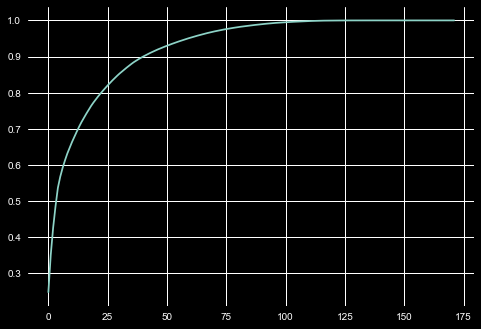

In [235]:
pca1 = PCA()
pca1.fit(temp)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

In [236]:
model = PCA(n_components=35).fit(temp)

In [237]:
n_pcs= model.components_.shape[0]
n_pcs

35

In [238]:
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

In [239]:
initial_columns = tempDf.columns

In [240]:
most_important_names = [
    initial_columns[most_important[i]] for i in range(n_pcs)]

In [241]:
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

In [242]:
df = pd.DataFrame(dic.items())

In [243]:
pcaCols = df[1].values

In [244]:
pcaCols

array(['FILESTAT_Nonfiler', 'YEAR_94', 'ASEX_Female',
       'HHDREL_Householder', 'AMARITL_Married-civilian spouse present',
       'HHDREL_Householder', 'ADTIND_40-51', 'AAGE_18-36', 'ADTIND_30-40',
       'NOEMP_4-6', 'AAGE_36-54', 'ADTOCC_18-27', 'ADTOCC_27-36',
       'AHGA_Some college but no degree', 'MIGSAME_No',
       'PARENT_Both parents present', 'ACLSWKR_Private', 'MIGSAME_No',
       'ADTOCC_36-46', 'FILESTAT_Nonfiler',
       'AHGA_Bachelors degree(BA AB BS)', 'WKSWORK_41-52',
       'AWKSTAT_Full-time schedules', 'AWKSTAT_Full-time schedules',
       'FILESTAT_Nonfiler', 'ADTIND_20-30', 'AAGE_72-90', 'NOEMP_0-1',
       'HHDREL_Other relative of householder', 'NOEMP_3-4',
       'ADTIND_20-30', 'AMARITL_Never married',
       'AMJIND_Manufacturing-durable goods', 'AMJIND_Retail trade',
       'AMARITL_Widowed'], dtype=object)

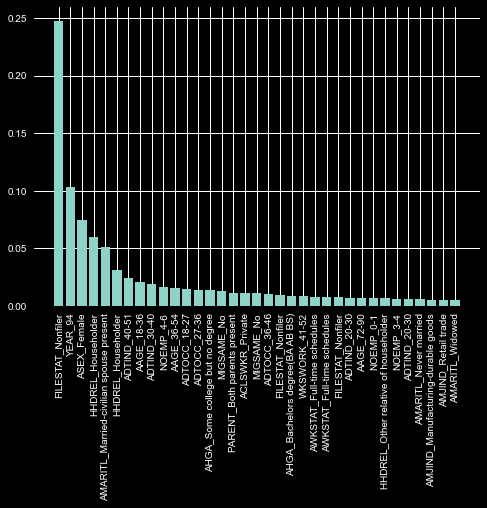

In [245]:
plt.bar(range(len(pcaCols)), model.explained_variance_ratio_)
plt.xticks(range(len(pcaCols)), pcaCols, rotation=90)
plt.show()

In [246]:
finalData = pd.DataFrame(model.transform(temp), columns=pcaCols)

In [247]:
finalData.head()

,FILESTAT_Nonfiler,YEAR_94,ASEX_Female,HHDREL_Householder,AMARITL_Married-civilian spouse present,HHDREL_Householder,ADTIND_40-51,AAGE_18-36,ADTIND_30-40,NOEMP_4-6,...,ADTIND_20-30,AAGE_72-90,NOEMP_0-1,HHDREL_Other relative of householder,NOEMP_3-4,ADTIND_20-30,AMARITL_Never married,AMJIND_Manufacturing-durable goods,AMJIND_Retail trade,AMARITL_Widowed
0,0.483770,1.300731,1.385809,0.545099,1.089905,-0.001697,-0.335297,0.272450,0.313342,0.189537,...,0.007633,0.700025,-0.000173,-0.789237,0.149943,0.463481,0.417684,-0.147158,-0.010370,0.500692
1,-1.085517,-0.905070,-0.765526,1.233874,-0.009954,0.162979,-0.255409,0.211922,0.558430,-1.297599,...,-0.372920,0.002570,0.231132,0.609458,-0.187175,0.627769,0.106766,-0.413206,-0.073486,-0.186004
2,0.974109,1.329427,0.697972,0.075653,1.145918,-0.324754,0.201184,-0.215083,-0.077550,-0.227082,...,-0.031756,0.264523,-0.068345,0.092954,-0.074004,0.024816,0.097152,-0.129247,0.102179,-0.013141
3,2.699037,-0.882720,-0.060631,-0.618924,-0.110916,0.474999,-0.253113,-0.113785,0.091828,-0.066329,...,-0.038059,-0.042006,-0.053019,-0.096502,-0.006808,-0.003311,-0.070476,0.014073,0.038695,-0.010041
4,2.699037,-0.882720,-0.060631,-0.618924,-0.110916,0.474999,-0.253113,-0.113785,0.091828,-0.066329,...,-0.038059,-0.042006,-0.053019,-0.096502,-0.006808,-0.003311,-0.070476,0.014073,0.038695,-0.010041


In [248]:
ctr  = 0
for i in finalPopulationData.columns:
    print(ctr, i)
    ctr += 1

0 AAGE_0-18
1 AAGE_18-36
2 AAGE_36-54
3 AAGE_54-72
4 AAGE_72-90
5 ACLSWKR_Federal government
6 ACLSWKR_Local government
7 ACLSWKR_Never worked
8 ACLSWKR_Not in universe
9 ACLSWKR_Private
10 ACLSWKR_Self-employed-incorporated
11 ACLSWKR_Self-employed-not incorporated
12 ACLSWKR_State government
13 ACLSWKR_Without pay
14 ADTIND_0-10
15 ADTIND_10-20
16 ADTIND_20-30
17 ADTIND_30-40
18 ADTIND_40-51
19 ADTOCC_0-9
20 ADTOCC_9-18
21 ADTOCC_18-27
22 ADTOCC_27-36
23 ADTOCC_36-46
24 AHGA_10th grade
25 AHGA_11th grade
26 AHGA_12th grade no diploma
27 AHGA_1st 2nd 3rd or 4th grade
28 AHGA_5th or 6th grade
29 AHGA_7th and 8th grade
30 AHGA_9th grade
31 AHGA_Associates degree-academic program
32 AHGA_Associates degree-occup /vocational
33 AHGA_Bachelors degree(BA AB BS)
34 AHGA_Children
35 AHGA_Doctorate degree(PhD EdD)
36 AHGA_High school graduate
37 AHGA_Less than 1st grade
38 AHGA_Masters degree(MA MS MEng MEd MSW MBA)
39 AHGA_Prof school degree (MD DDS DVM LLB JD)
40 AHGA_Some college but no degr

## 4. Clustering

### Applying K-Medians Clustering

In [416]:
from pyclustering.cluster.kmedians import kmedians

In [451]:
dataPts = finalData.values

In [452]:
def get_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [453]:
def lossFn(medians, clusters, dataPoints):
    loss = 0
    for i in tqdm(range(len(clusters))):
        for j in range(len(clusters[i])):
            loss += get_distance(medians[i], dataPoints[clusters[i][j]])
    return loss

In [297]:
losses = []
for j in tqdm(range(10, 25)):
    initCenter = []
    for i in range(j):
        initCenter.append(finalData.sample(n=1, random_state=i).iloc[0])
    kmed = kmedians(data=finalData, number_clusters=j, initial_medians=initCenter)
    kmed.process()
    medians = kmedians.get_medians(kmed)
    clusters = kmedians.get_clusters(kmed)
    print(len(medians), len(clusters))
    losses.append(kmedians.get_total_wce(kmed))


  7%|▋         | 1/15 [02:17<32:07, 137.65s/it]

10 10


 13%|█▎        | 2/15 [04:37<30:04, 138.77s/it]

10 10


 20%|██        | 3/15 [06:51<27:21, 136.75s/it]

11 11


 27%|██▋       | 4/15 [09:09<25:09, 137.27s/it]

12 12


 33%|███▎      | 5/15 [11:31<23:09, 138.96s/it]

13 13


 40%|████      | 6/15 [13:56<21:07, 140.84s/it]

14 14


 47%|████▋     | 7/15 [16:30<19:22, 145.30s/it]

15 15


 53%|█████▎    | 8/15 [19:12<17:34, 150.69s/it]

15 15


 60%|██████    | 9/15 [21:43<15:03, 150.56s/it]

16 16


 67%|██████▋   | 10/15 [24:28<12:55, 155.16s/it]

17 17


 73%|███████▎  | 11/15 [27:32<10:55, 163.83s/it]

18 18


 80%|████████  | 12/15 [30:29<08:23, 167.88s/it]

19 19


 87%|████████▋ | 13/15 [33:09<05:31, 165.61s/it]

20 20


 93%|█████████▎| 14/15 [36:10<02:50, 170.31s/it]

21 21


100%|██████████| 15/15 [38:56<00:00, 155.79s/it]

22 22


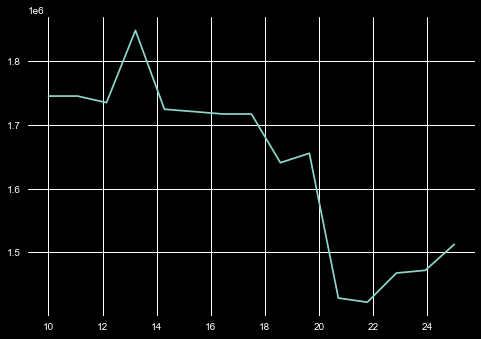

In [300]:
plt.plot(np.linspace(10, 25, len(losses)), losses)

In [454]:
def getAvgDist(clusters, medians, dataPts):
    dist = []
    for i in tqdm(range(len(clusters))):
        for j in range(len(clusters[i])):
            dist.append(get_distance(dataPts[clusters[i][j]], medians[i]))
    return np.mean(dist)

In [456]:
losses = []
avgDist = []
for j in tqdm(range(20, 25)):
    initCenter = []
    for i in range(j):
        initCenter.append(finalData.sample(n=1, random_state=10*i).iloc[0])
    kmed = kmedians(data=finalData, number_clusters=j,
                    initial_medians=initCenter)
    kmed.process()
    medians = kmedians.get_medians(kmed)
    clusters = kmedians.get_clusters(kmed)
    # print(len(medians), len(clusters))
    losses.append(kmedians.get_total_wce(kmed))
    avgDist.append(getAvgDist(clusters, medians, dataPts))

100%|██████████| 5/5 [14:22<00:00, 172.45s/it]


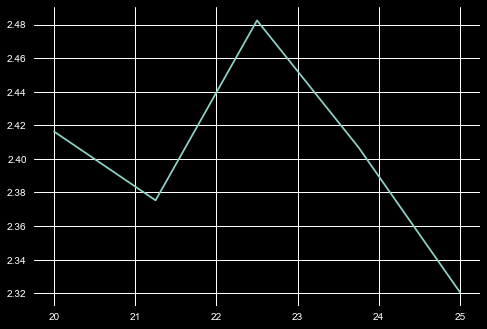

In [457]:
plt.plot(np.linspace(20, 25, len(avgDist)), avgDist)

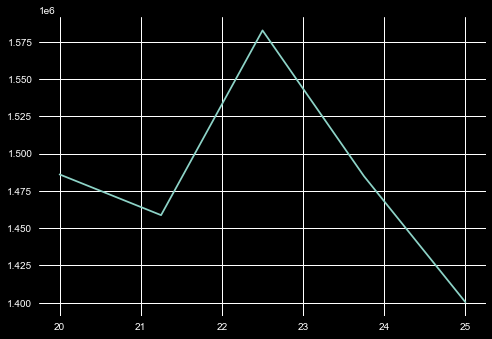

In [458]:
plt.plot(np.linspace(20, 25, len(losses)), losses)

In [487]:
finalDataSsDf = pd.DataFrame(finalDatass)

In [488]:
k = 21
initCenter = []
for i in range(k):
    initCenter.append(finalDataSsDf.sample(n=1, random_state=i*10).iloc[0])
kmed = kmedians(data=finalDataSsDf, number_clusters=k,
                initial_medians=initCenter)
kmed.process()
medians = kmedians.get_medians(kmed)
clusters = kmedians.get_clusters(kmed)


# 5. Handling More than 50k dataset

## 1. Preprocessing

In [358]:
moreThan50k = pd.read_csv('Weights/more_than_50k.csv')

In [359]:
moreThan50k.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95


In [360]:
moreThan50k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AAGE      3580 non-null   int64 
 1   ACLSWKR   3580 non-null   object
 2   ADTIND    3580 non-null   int64 
 3   ADTOCC    3580 non-null   int64 
 4   AHGA      3580 non-null   object
 5   AHRSPAY   3580 non-null   int64 
 6   AHSCOL    3580 non-null   object
 7   AMARITL   3580 non-null   object
 8   AMJIND    3580 non-null   object
 9   AMJOCC    3580 non-null   object
 10  ARACE     3580 non-null   object
 11  AREORGN   3580 non-null   object
 12  ASEX      3580 non-null   object
 13  AUNMEM    3580 non-null   object
 14  AUNTYPE   3580 non-null   object
 15  AWKSTAT   3580 non-null   object
 16  CAPGAIN   3580 non-null   int64 
 17  CAPLOSS   3580 non-null   int64 
 18  DIVVAL    3580 non-null   int64 
 19  FILESTAT  3580 non-null   object
 20  GRINREG   3580 non-null   object
 21  GRINST    3580

In [361]:
moreThan50k.describe()

,AAGE,ADTIND,ADTOCC,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,SEOTR,VETYN,WKSWORK,YEAR
count,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000
mean,46.051397,29.218994,11.978492,75.000838,4626.358939,192.334358,1629.039665,4.027095,0.260894,1.982402,47.814246,94.532402
std,11.858490,15.440051,11.982703,407.656986,16403.578911,606.889082,7177.324140,2.116895,0.637456,0.131503,12.548865,0.499019
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.000000
25%,37.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,52.000000,94.000000
50%,45.000000,33.000000,8.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,52.000000,95.000000
75%,53.000000,42.000000,17.000000,0.000000,0.000000,0.000000,400.000000,6.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,8000.000000,99999.000000,3004.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


### 1.1 Replacing missing data with NaN

In [362]:
moreThan50k.loc[8, 'GRINST']

' Not in universe'

In [363]:
for i in moreThan50k.columns:
    if moreThan50k[i].dtype != 'int64':
        moreThan50k[i] = moreThan50k[i].str.strip()

In [364]:
moreThan50k.loc[8]

AAGE                                       31
ACLSWKR            Self-employed-incorporated
ADTIND                                     37
ADTOCC                                      2
AHGA               Some college but no degree
AHRSPAY                                     0
AHSCOL                        Not in universe
AMARITL                         Never married
AMJIND           Business and repair services
AMJOCC         Executive admin and managerial
ARACE                                   White
AREORGN                             All other
ASEX                                   Female
AUNMEM                        Not in universe
AUNTYPE                       Not in universe
AWKSTAT                   Full-time schedules
CAPGAIN                                 27828
CAPLOSS                                     0
DIVVAL                                    200
FILESTAT                               Single
GRINREG                       Not in universe
GRINST                        Not 

In [365]:
moreThan50k = moreThan50k.replace('?', np.NaN)

In [366]:
columns50k = []
percentageOfNan50k = []
colsToRemove50k = []
for i in moreThan50k.columns:
    columns50k.append(i)
    percentageOfNan50k.append(
        moreThan50k[i].isnull().sum()*100/moreThan50k.shape[0])
    if percentageOfNan50k[-1] > 40:
        colsToRemove50k.append(i)

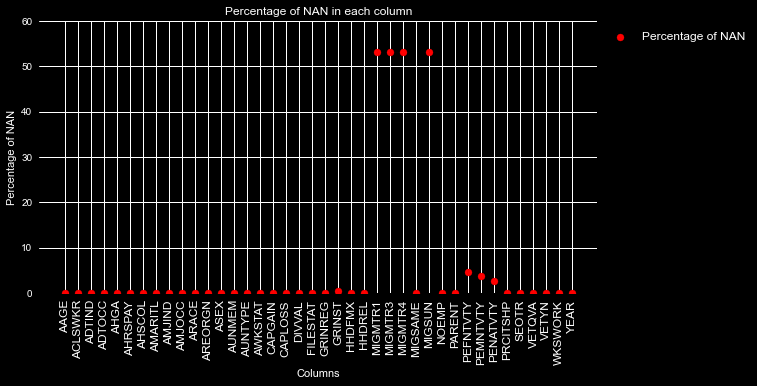

In [367]:
plt.figure(figsize=(10,5))
plt.scatter(columns50k, percentageOfNan50k, color='red',
            marker='o', label='Percentage of NAN')
plt.xticks(rotation=90, fontsize=12)
plt.ylim(0, 60, 10)
plt.xlabel('Columns')
plt.ylabel('Percentage of NAN')
plt.title('Percentage of NAN in each column')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()


In [368]:
len(moreThan50k.columns)

40

In [369]:
moreThan50k.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3',
       'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY',
       'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK', 'YEAR'],
      dtype='object')

In [370]:
colsToRemove

['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']

In [371]:
preprocessedMoreThan50k = moreThan50k.drop(colsToRemove, axis=1)

In [372]:
preprocessedMoreThan50k.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

### 2.1 Histogram

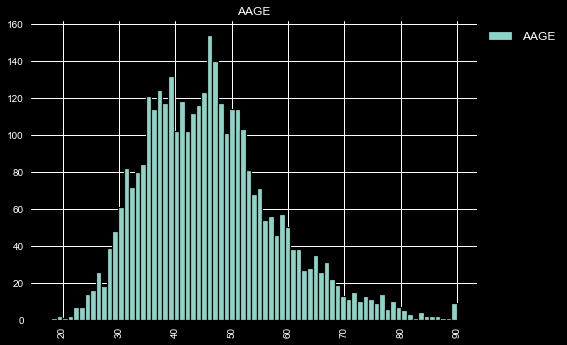

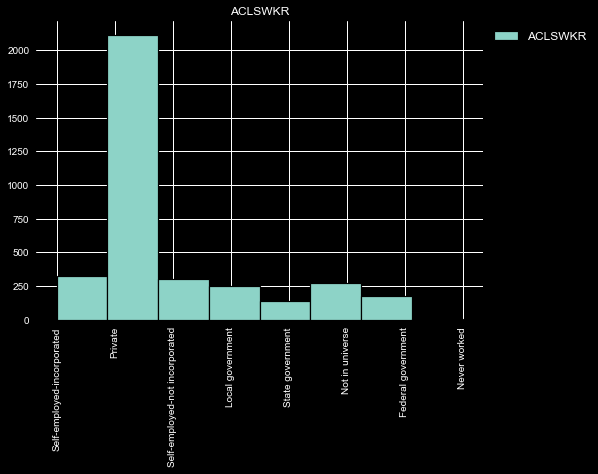

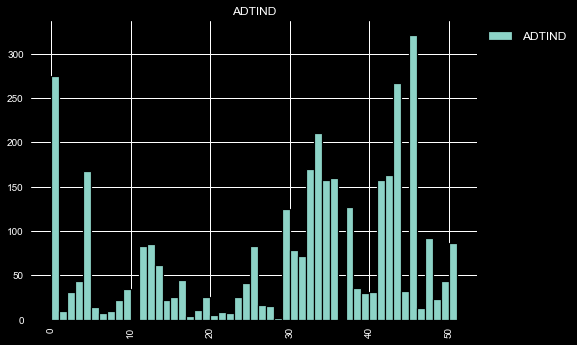

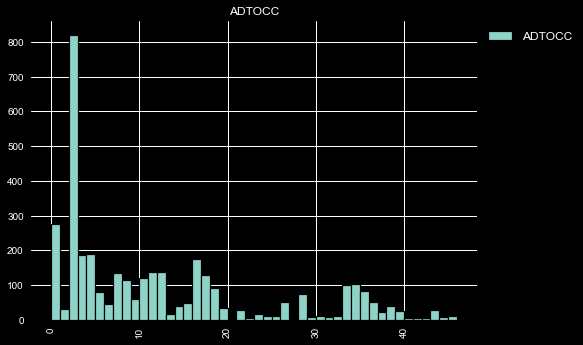

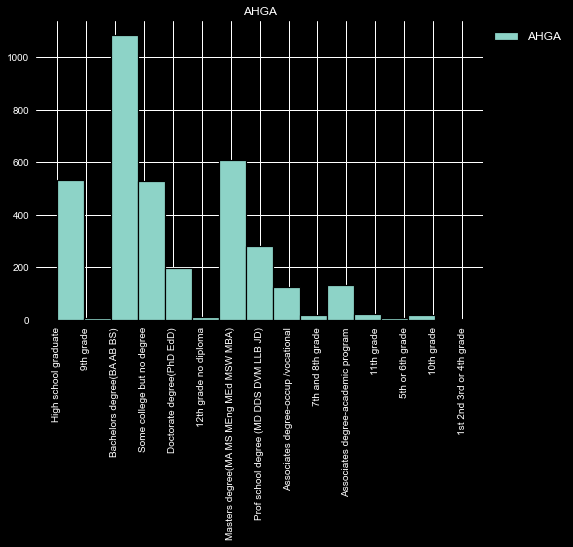

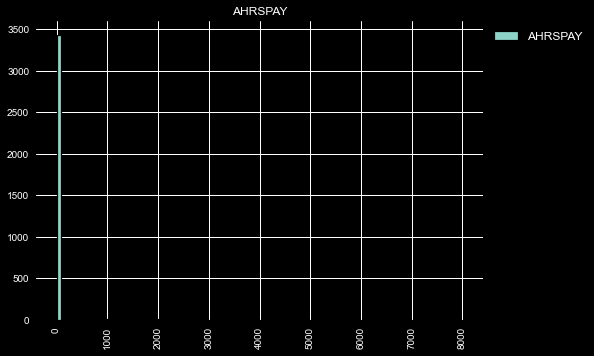

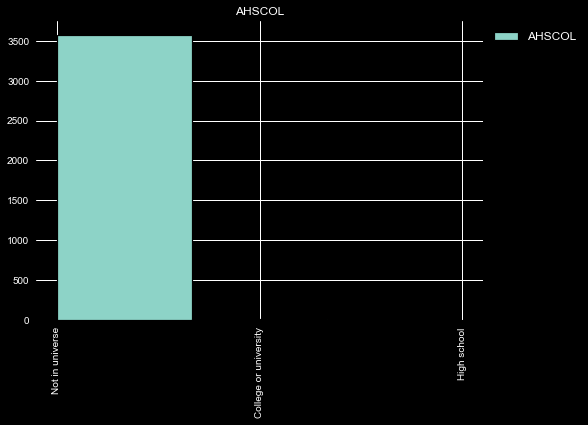

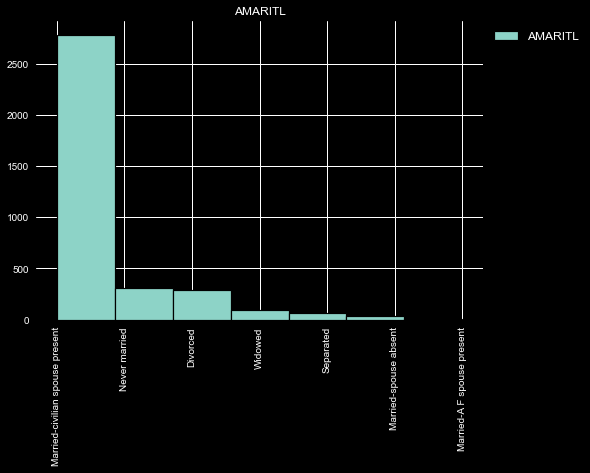

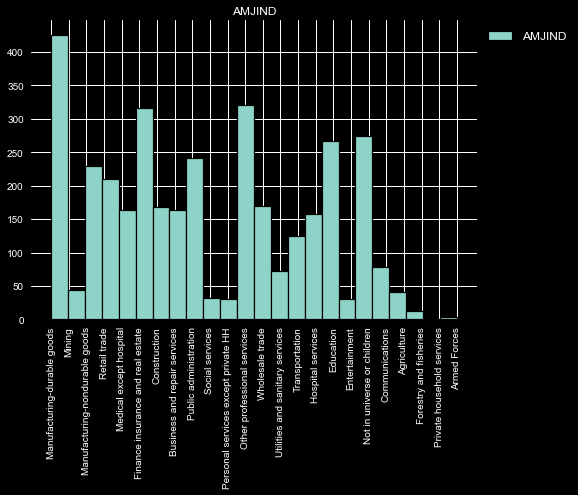

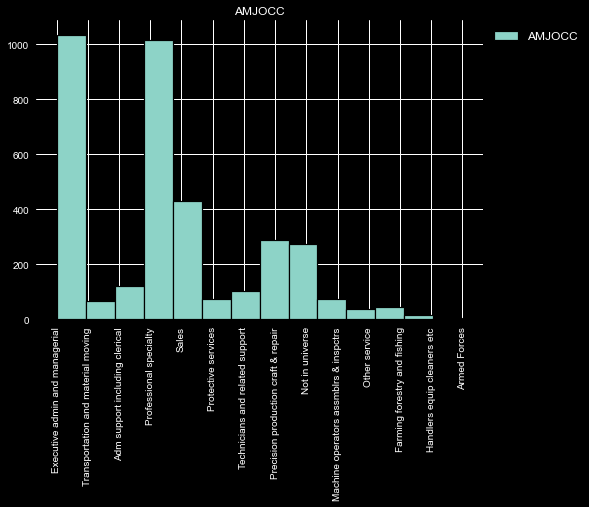

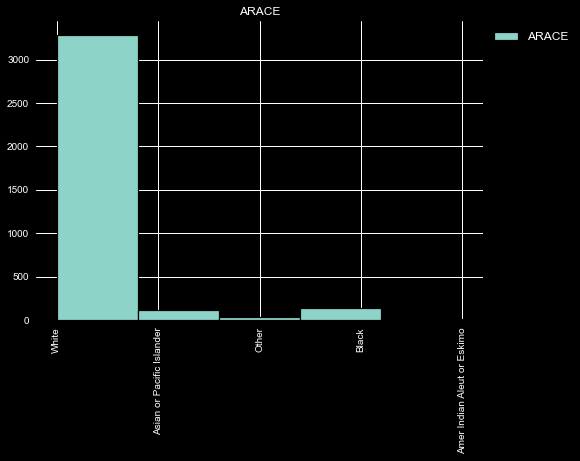

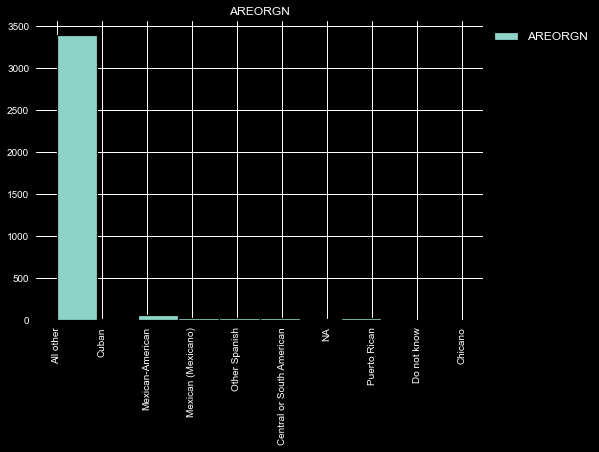

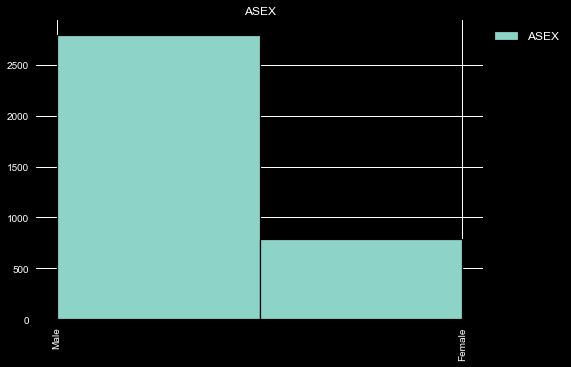

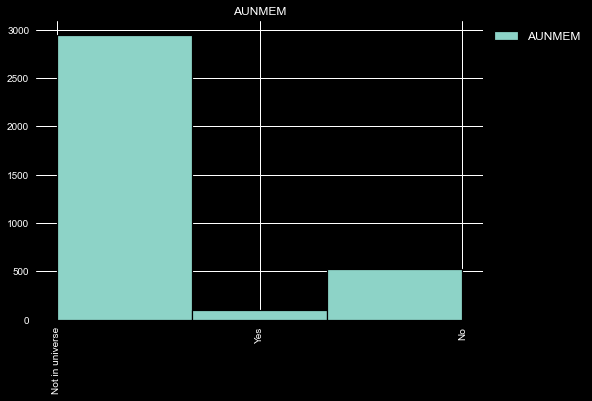

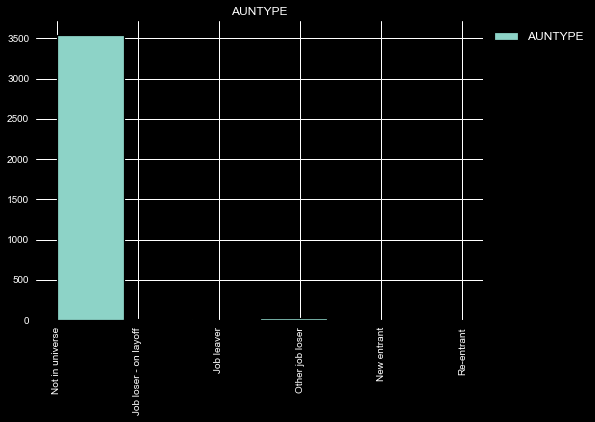

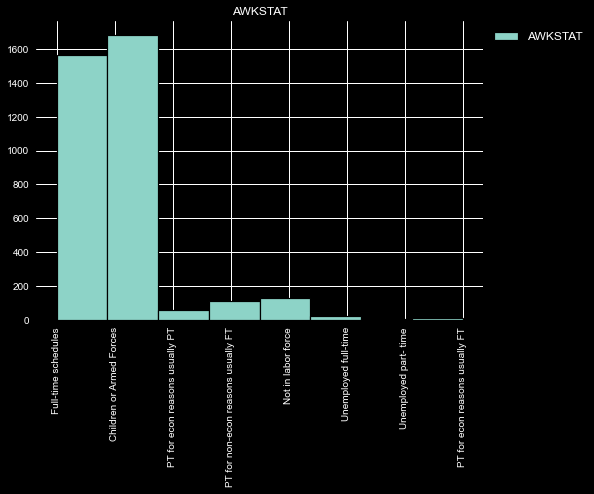

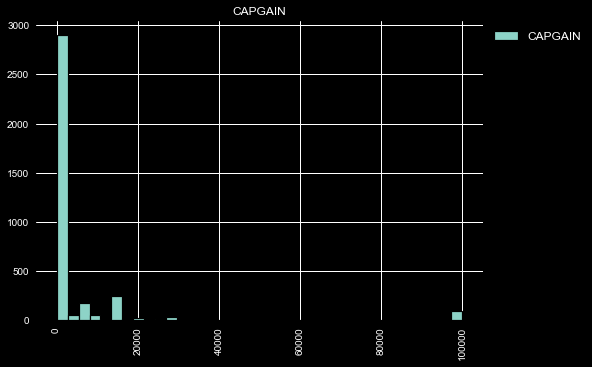

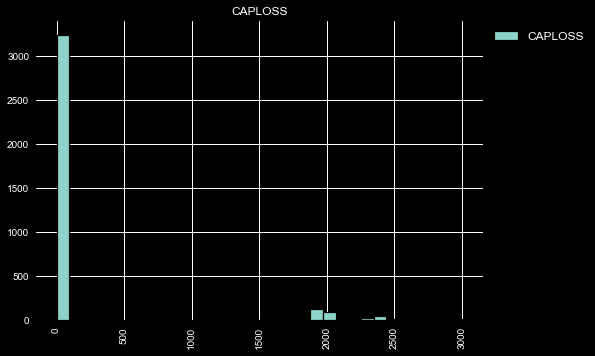

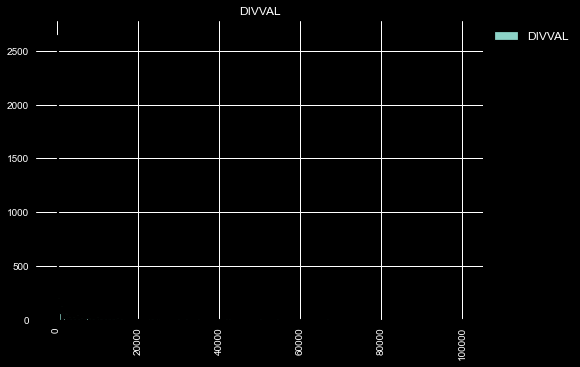

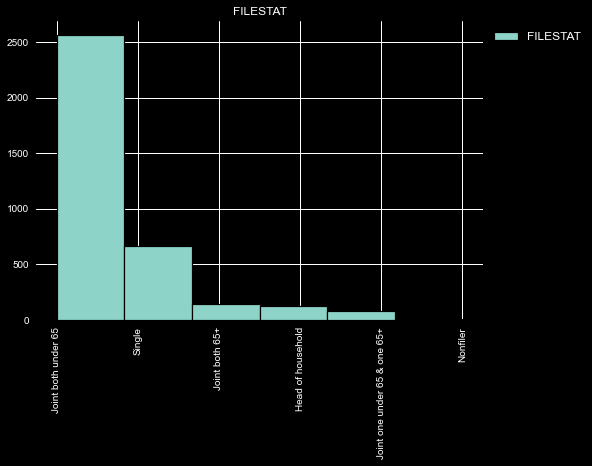

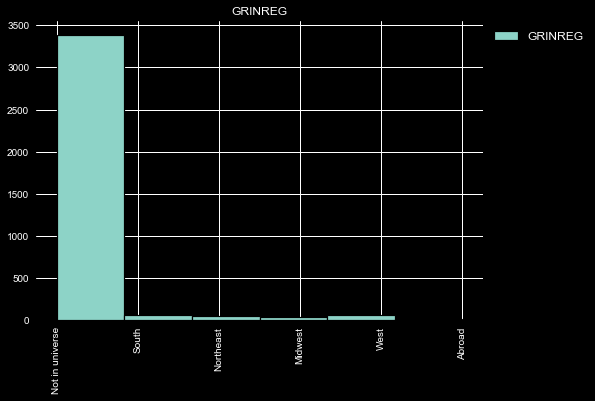

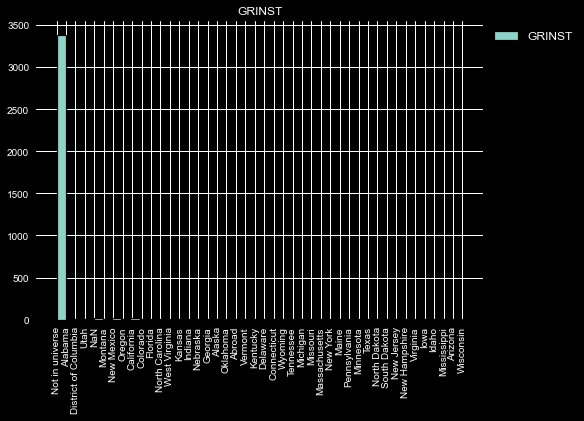

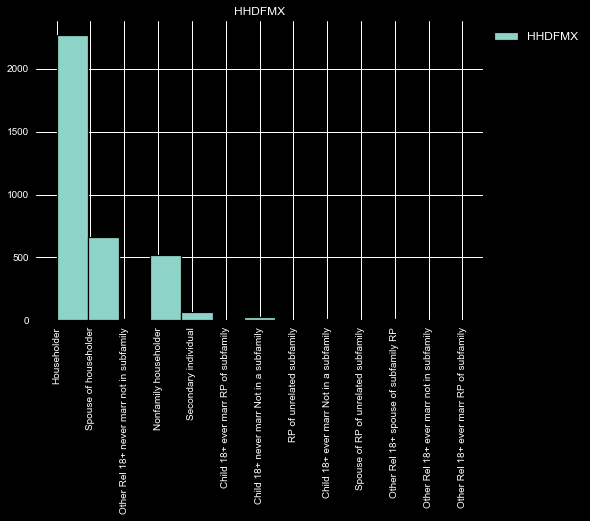

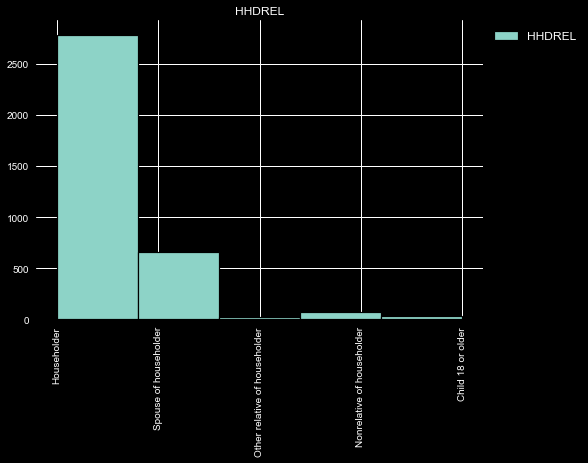

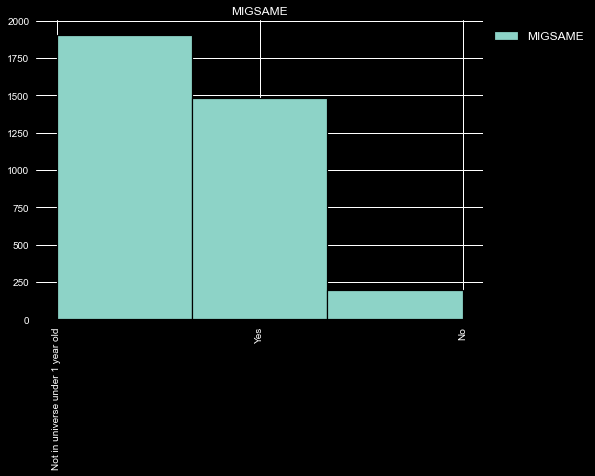

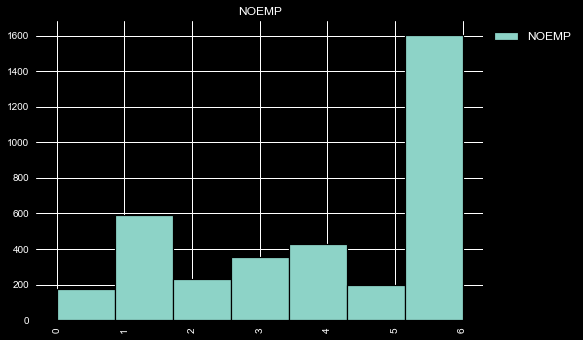

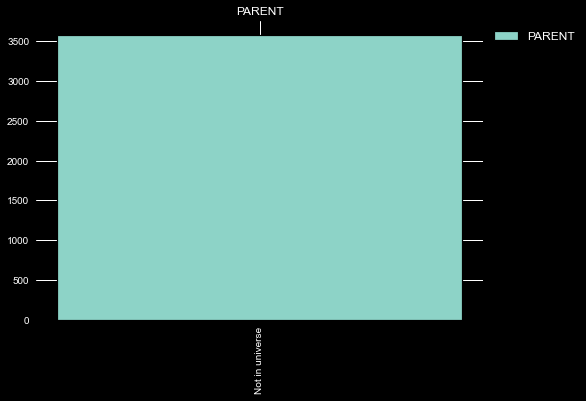

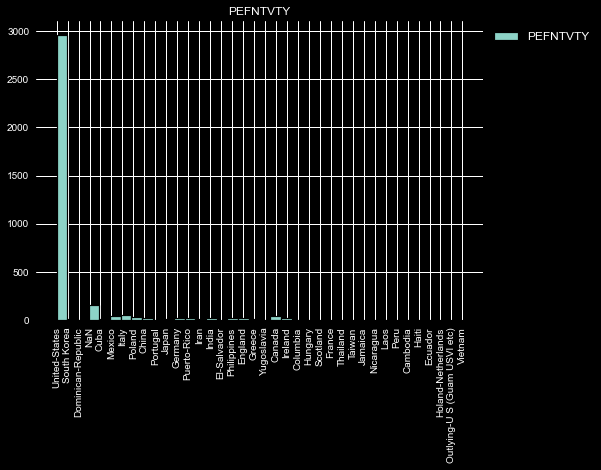

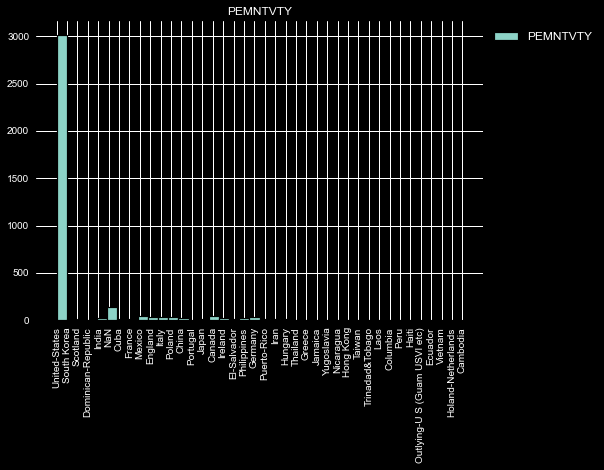

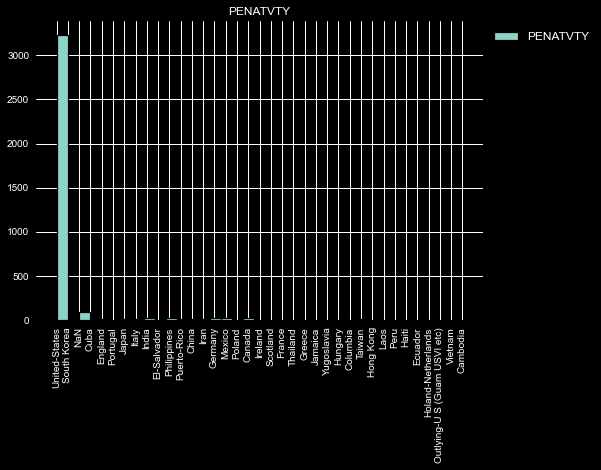

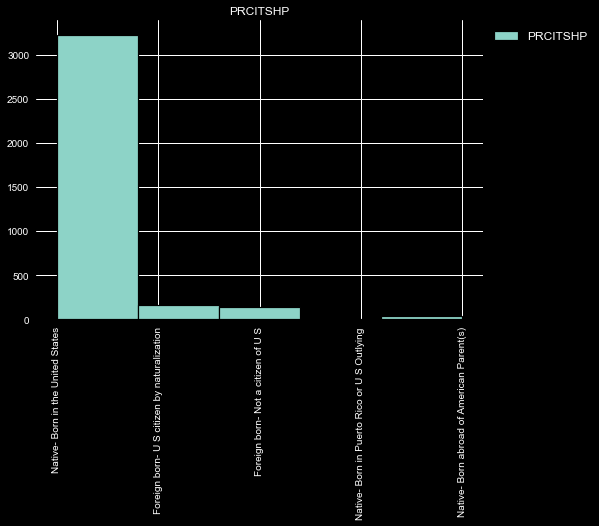

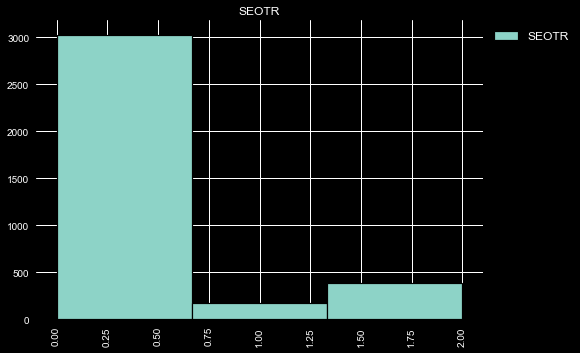

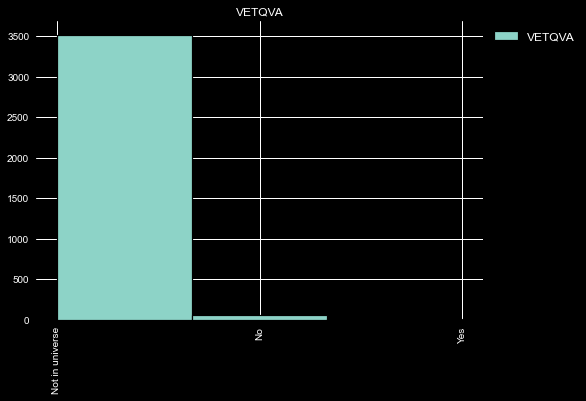

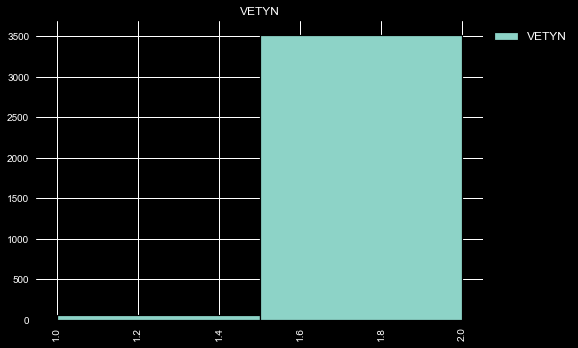

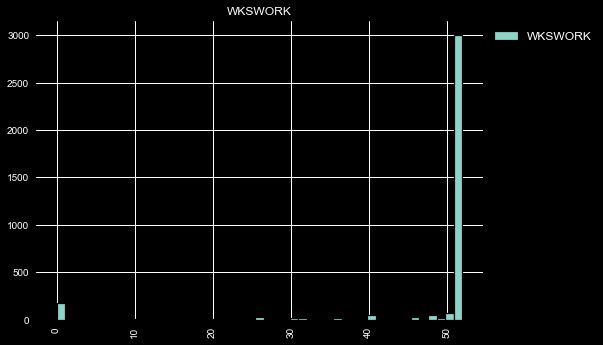

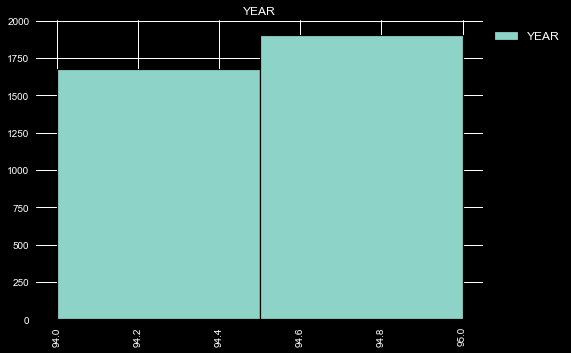

In [373]:
# fig = plt.figure(figsize=(40, 90))
# row = 4
# col = 9
# plotNo = 2
for j in range(len(preprocessedMoreThan50k.columns)):
    # if plotNo == 10:
    # break
    # if i != 'GRINST' and i != 'PEFNTVTY' and i != 'PEMNTVTY' and i != 'PENATVTY':
    # print(i)
    i = preprocessedMoreThan50k.columns[j]
    plt.hist(preprocessedMoreThan50k[i].replace(np.NaN, 'NaN'), bins=len(
        preprocessedMoreThan50k[i].unique()), label=i, edgecolor='black', linewidth=1.2, histtype='barstacked')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.title(i)
    # fig.add_subplot(col, row, plotNo)
    # plotNo += 1
    # col += 1
    # if col == 9:
    #     col = 0
    #     row += 1
    plt.show()


### 2.2 Removing the columns where one value dominates over other

In [374]:
imbalancedCols

['AHRSPAY',
 'AHSCOL',
 'ARACE',
 'AREORGN',
 'AUNMEM',
 'AUNTYPE',
 'CAPGAIN',
 'CAPLOSS',
 'DIVVAL',
 'GRINREG',
 'GRINST',
 'PEFNTVTY',
 'PEMNTVTY',
 'PENATVTY',
 'PRCITSHP',
 'SEOTR',
 'VETQVA']

In [375]:
preprocessedMoreThan50k.columns


Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

In [376]:
preprocessedMoreThan50k.drop(imbalancedCols, axis=1, inplace=True)


In [377]:
preprocessedMoreThan50k.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND',
       'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME',
       'NOEMP', 'PARENT', 'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

## 3. Imputation, Bucketization and One Hot Encoding

### 3.1 Replacing missing data with mode

In [378]:
for i in preprocessedMoreThan50k.columns:
    preprocessedMoreThan50k[i] = preprocessedMoreThan50k[i].replace(np.NaN, globalModeDict[i])

### 3.2 Bucketization of the data

In [379]:
finalBuckets

{'AAGE': array([ 0., 18., 36., 54., 72., 90.]),
 'ADTIND': array([ 0. , 10.2, 20.4, 30.6, 40.8, 51. ]),
 'ADTOCC': array([ 0. ,  9.2, 18.4, 27.6, 36.8, 46. ]),
 'NOEMP': array([0. , 1.2, 2.4, 3.6, 4.8, 6. ]),
 'WKSWORK': array([ 0. , 10.4, 20.8, 31.2, 41.6, 52. ])}

In [380]:
original50k = preprocessedMoreThan50k.copy()

In [381]:
original50k.shape, preprocessedMoreThan50k.shape

((3580, 19), (3580, 19))

In [382]:
preprocessedMoreThan50k = original50k.copy()

In [383]:
for i in preprocessedMoreThan50k.columns:
    if preprocessedMoreThan50k[i].dtype == 'int64' and len(preprocessedMoreThan50k[i].unique()) > 6:
        print(i)
        # finalbins = np.linspace(preprocessedMoreThan50k[i].min(), preprocessedMoreThan50k[i].max(), 6)
        finalbins = finalBuckets[i]
        finalLabels = []
        for j in range(0, len(finalbins)-1):
            # finalLabels.append((finalbins[j] + finalbins[j+1])/2)
            finalLabels.append(str(int(finalbins[j])) + '-' + str(int(finalbins[j+1])))
        preprocessedMoreThan50k[i] = pd.cut(preprocessedMoreThan50k[i], bins=finalbins, labels=finalLabels)


AAGE
ADTIND
ADTOCC
NOEMP
WKSWORK


In [384]:
preprocessedMoreThan50k.shape

(3580, 19)

In [385]:
preprocessedPopulation.AAGE.unique()

['72-90', '54-72', '0-18', '36-54', '18-36', NaN]
Categories (5, object): ['0-18' < '18-36' < '36-54' < '54-72' < '72-90']

In [386]:
preprocessedMoreThan50k.AAGE.unique()

['54-72', '36-54', '18-36', '72-90', '0-18']
Categories (5, object): ['0-18' < '18-36' < '36-54' < '54-72' < '72-90']

In [387]:
preprocessedMoreThan50k.loc[0]

AAGE                                   54-72
ACLSWKR           Self-employed-incorporated
ADTIND                                 10-20
ADTOCC                                   0-9
AHGA                    High school graduate
AMARITL      Married-civilian spouse present
AMJIND           Manufacturing-durable goods
AMJOCC        Executive admin and managerial
ASEX                                    Male
AWKSTAT                  Full-time schedules
FILESTAT                 Joint both under 65
HHDFMX                           Householder
HHDREL                           Householder
MIGSAME     Not in universe under 1 year old
NOEMP                                    1-2
PARENT                       Not in universe
VETYN                                      2
WKSWORK                                41-52
YEAR                                      95
Name: 0, dtype: object

### 3.3 One Hot Encoding All the Features

In [388]:
from sklearn.preprocessing import OneHotEncoder

In [389]:
oht = OneHotEncoder(sparse=True)

In [390]:
# # temp = pd.get_dummies(preprocessedPopulation['AAGE'], sparse=True, drop_first=False
# # columns=preprocessedPopulation['AAGE'].unique()
# # )
# for i in preprocessedPopulation.columns:
#     preprocessedPopulation[i] = pd.get_dummies(preprocessedPopulation[i], sparse=True, drop_first=False)

In [391]:
preprocessedMoreThan50k['AAGE'].value_counts()


36-54    2038
18-36     794
54-72     637
72-90     110
0-18        1
Name: AAGE, dtype: int64

In [392]:
preprocessedMoreThan50k['AAGE']


0       54-72
1       36-54
2       36-54
3       18-36
4       18-36
        ...  
3575    54-72
3576    54-72
3577    36-54
3578    36-54
3579    54-72
Name: AAGE, Length: 3580, dtype: category
Categories (5, object): ['0-18' < '18-36' < '36-54' < '54-72' < '72-90']

In [393]:
finalPopulationData50k = pd.DataFrame()

In [394]:
preprocessedMoreThan50k.shape

(3580, 19)

In [395]:
full = 0
part = 0
for itr in (range(len(preprocessedMoreThan50k.columns))):
    i = preprocessedMoreThan50k.columns[itr]
    ohtVector = pd.get_dummies(preprocessedMoreThan50k[i], sparse=True, drop_first=False)
    # print(ohtVector.columns)
    part += len(ohtVector.columns)
    # print(oneHotColumns[i])
    full += len(oneHotColumns[i])
    # if len(oneHotColumns[i]) != len(ohtVector.columns):
    #     print(i)
    #     print(oneHotColumns[i])
    #     print(ohtVector.columns)
    for j in ohtVector.columns:
        finalPopulationData50k[str(i) + '_' + str(j)] = ohtVector[j]
full, part


(172, 135)

In [396]:
for i in finalPopulationData.columns:
    if i not in finalPopulationData50k.columns:
        finalPopulationData50k[i] = 0

In [556]:
finalPopulationData50k.shape

(3580, 172)

In [403]:
s1 = set(finalPopulationData50k.columns)
s2 = set(finalPopulationData.columns)

In [405]:
print(s1.difference(s2))

set()


### 3.4 Feature Transformation

In [406]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [407]:
tempDf50k = finalPopulationData50k.copy()

In [408]:
tempArr = tempDf50k.values

In [409]:
tempDf50k = model.transform(tempArr)

In [411]:
len(pcaCols)

35

In [413]:
finalData50k = pd.DataFrame(model.transform(tempArr), columns=pcaCols)

In [414]:
finalData.head()

,FILESTAT_Nonfiler,YEAR_94,ASEX_Female,HHDREL_Householder,AMARITL_Married-civilian spouse present,HHDREL_Householder,ADTIND_40-51,AAGE_18-36,ADTIND_30-40,NOEMP_4-6,...,ADTIND_20-30,AAGE_72-90,NOEMP_0-1,HHDREL_Other relative of householder,NOEMP_3-4,ADTIND_20-30,AMARITL_Never married,AMJIND_Manufacturing-durable goods,AMJIND_Retail trade,AMARITL_Widowed
0,0.483770,1.300731,1.385809,0.545099,1.089905,-0.001697,-0.335297,0.272450,0.313342,0.189537,...,0.007633,0.700025,-0.000173,-0.789237,0.149943,0.463481,0.417684,-0.147158,-0.010370,0.500692
1,-1.085517,-0.905070,-0.765526,1.233874,-0.009954,0.162979,-0.255409,0.211922,0.558430,-1.297599,...,-0.372920,0.002570,0.231132,0.609458,-0.187175,0.627769,0.106766,-0.413206,-0.073486,-0.186004
2,0.974109,1.329427,0.697972,0.075653,1.145918,-0.324754,0.201184,-0.215083,-0.077550,-0.227082,...,-0.031756,0.264523,-0.068345,0.092954,-0.074004,0.024816,0.097152,-0.129247,0.102179,-0.013141
3,2.699037,-0.882720,-0.060631,-0.618924,-0.110916,0.474999,-0.253113,-0.113785,0.091828,-0.066329,...,-0.038059,-0.042006,-0.053019,-0.096502,-0.006808,-0.003311,-0.070476,0.014073,0.038695,-0.010041
4,2.699037,-0.882720,-0.060631,-0.618924,-0.110916,0.474999,-0.253113,-0.113785,0.091828,-0.066329,...,-0.038059,-0.042006,-0.053019,-0.096502,-0.006808,-0.003311,-0.070476,0.014073,0.038695,-0.010041


In [480]:
ss = StandardScaler()

In [481]:
finalDatass = ss.fit_transform(finalData)

In [482]:
finalData50kss = ss.transform(finalData50k)

### Part6

In [460]:
len(medians), len(clusters), len(clusters[0])

(21, 21, 5180)

In [461]:
clusterLen = {}

In [462]:
for i in range(len(clusters)):
    clusterLen[i] = clusters[i]

In [507]:
clusterLen = []
titles = []
for i in clusters:
    clusterLen.append(len(i))
    titles.append('Cluster' + str(len(titles) + 1))

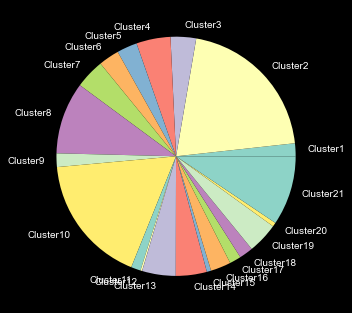

In [508]:
plt.pie(clusterLen, labels = titles)
plt.show()

In [509]:
preds = kmed.predict(finalData50kss)

In [510]:
predClusters = [0 for i in range(21)]
for i in preds:
    predClusters[i] += 1

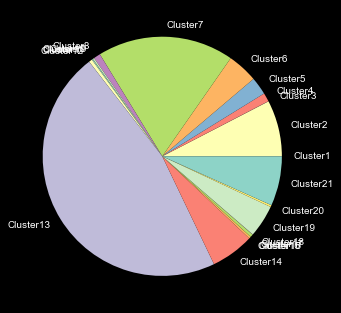

In [511]:
plt.pie(predClusters, labels = titles)
plt.show()

In [433]:
clusterLen

[[40984,
  26450,
  76258,
  73424,
  41728,
  147825,
  73935,
  127982,
  147485,
  94105,
  26011,
  155767,
  194806,
  189887,
  32107,
  116543,
  148679,
  181651,
  7114,
  43650,
  61960,
  78780,
  11237,
  40238,
  174290,
  134014,
  50867,
  134640,
  141022,
  185463,
  76219,
  142518,
  10374,
  74052,
  186303,
  102492,
  3779,
  73082,
  15433,
  120903,
  96195,
  95872,
  179425,
  18328,
  40766,
  71957,
  126156,
  131694,
  134879,
  73370,
  40358,
  86966,
  8357,
  194514,
  188703,
  124575,
  159238,
  93179,
  51102,
  114465,
  11348,
  31481,
  37617,
  12180,
  80345,
  188557,
  106439,
  12592,
  25743,
  65688,
  20907,
  132102,
  74184,
  116766,
  32118,
  33482,
  148035,
  196484,
  44013,
  72173,
  83934,
  4556,
  148977,
  137312,
  20978,
  2981,
  133573,
  99641,
  139062,
  22352,
  113685,
  94375,
  11216,
  74508,
  67690,
  46985,
  98238,
  62216,
  125312,
  35038,
  64543,
  115585,
  92915,
  170142,
  140892,
  182924,
  67465,

In [469]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns


In [497]:
df_embed1 = pd.DataFrame(finalData50kss, columns=pcaCols)
x = 50
m = TSNE(learning_rate=x)
tsne_features = m.fit_transform(df_embed1)

<AxesSubplot:xlabel='x', ylabel='y'>

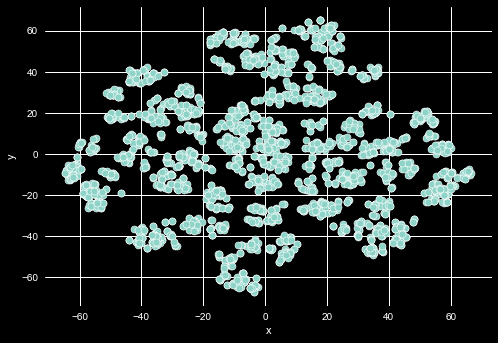

In [498]:
df_embed1['x'] = tsne_features[:, 0]
df_embed1['y'] = tsne_features[:, 1]
sns.scatterplot(x="x", y="y", data=df_embed1)


In [503]:
df_embed = pd.DataFrame(finalDatass, columns=pcaCols)
x = 50
n = TSNE(learning_rate=x)
tsne_features_og = n.fit_transform(df_embed)

In [504]:
np.save('tsne_original_ss.npy', tsne_features_og)

<AxesSubplot:xlabel='x', ylabel='y'>

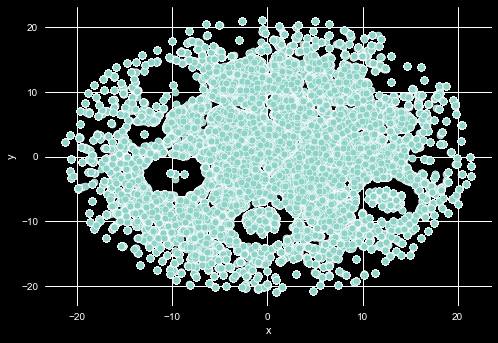

In [505]:
df_embed['x'] = tsne_features_og[:, 0]
df_embed['y'] = tsne_features_og[:, 1]
sns.scatterplot(x="x", y="y", data=df_embed)

<AxesSubplot:xlabel='x', ylabel='y'>

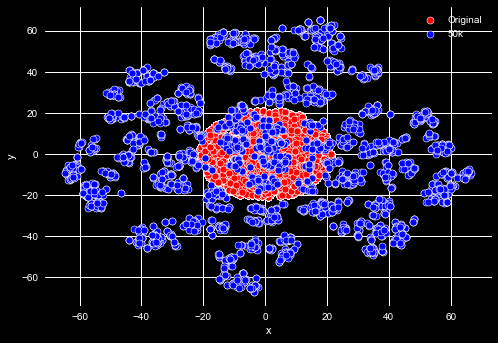

In [506]:
sns.scatterplot(x='x', y='y', data=df_embed, color='red', label='Original')
sns.scatterplot(x='x', y='y', data=df_embed1, color='blue', label='50k')

In [513]:
percentageInEachClusterPop = []
for i in clusters:
    percentageInEachClusterPop.append(len(i)*100/preprocessedPopulation.shape[0])

In [547]:
percentageInEachClusterPop50k = []
for i in range(len(predClusters)):
    percentageInEachClusterPop50k.append(
        predClusters[i]*100/preprocessedMoreThan50k.shape[0])


In [548]:
preprocessedMoreThan50k.shape

(3580, 19)

In [549]:
np.sum(percentageInEachClusterPop50k)


99.99999999999999

In [534]:
x = np.arange(21)
width = .35

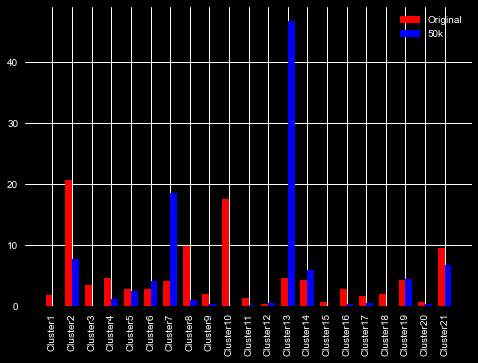

In [564]:
plt.bar(x-width/2, percentageInEachClusterPop, width, label='Original', color='red')
plt.bar(x+width/2, percentageInEachClusterPop50k, width, label='50k', color='blue')
plt.xticks(x, titles, rotation=90)
plt.legend()
plt.show()

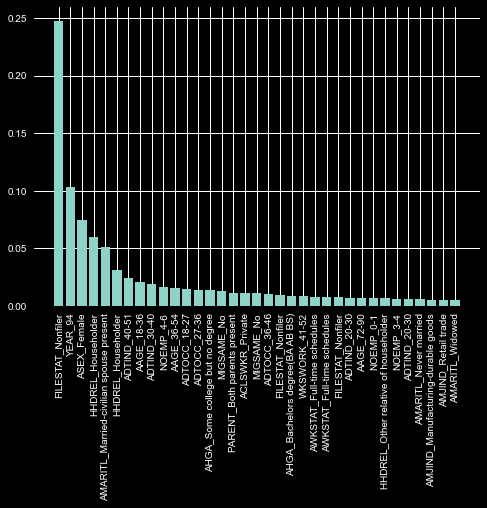

In [520]:
plt.bar(range(len(pcaCols)), model.explained_variance_ratio_)
plt.xticks(range(len(pcaCols)), pcaCols, rotation=90)
plt.show()


In [524]:
medians[1][0]

0.11307676206368862

In [529]:
invertedPop = model.inverse_transform(finalData)

In [555]:
finalData.shape

(199523, 35)

In [558]:
invertedPop = pd.DataFrame(
    invertedPop, columns=finalPopulationData50k.columns)

In [565]:
temp = invertedPop.FILESTAT_Nonfiler

AttributeError: 'Series' object has no attribute 'cut'

In [559]:
invertedPop.FILESTAT_Nonfiler.value_counts()

-0.019372    7764
 0.031696    7498
-0.031449    6703
 0.019619    6393
-0.012414    2094
             ... 
-0.012087       1
-0.075270       1
 0.205675       1
 0.028540       1
 0.084002       1
Name: FILESTAT_Nonfiler, Length: 86919, dtype: int64

In [574]:
finalbins = np.linspace(
    invertedPop['FILESTAT_Nonfiler'].min(), invertedPop['FILESTAT_Nonfiler'].max(), 50)
# finalBuckets[i] = finalbins
# finalLabels = []
# for j in range(0, len(finalbins)-1):
    # finalLabels.append((finalbins[j] + finalbins[j+1])/2)
    # finalLabels.append(
        # str(int(finalbins[j])) + '-' + str(int(finalbins[j+1])))
temp = pd.qcut(invertedPop['FILESTAT_Nonfiler'], 20)


In [597]:
barLabels = vals.index.tolist()
finalBarLabels = [str(i) for i in barLabels]

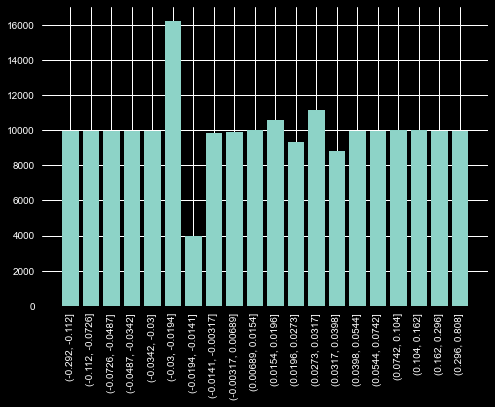

In [599]:
plt.bar(range(len(vals)), vals)
plt.xticks(range(len(finalBarLabels)), finalBarLabels, rotation=90)
plt.show()

In [577]:
vals = temp.value_counts().sort_index()

In [579]:
vals

(-0.292, -0.112]        9980
(-0.112, -0.0726]       9973
(-0.0726, -0.0487]      9976
(-0.0487, -0.0342]      9976
(-0.0342, -0.03]        9976
(-0.03, -0.0194]       16212
(-0.0194, -0.0141]      3996
(-0.0141, -0.00317]     9821
(-0.00317, 0.00689]     9877
(0.00689, 0.0154]      10012
(0.0154, 0.0196]       10563
(0.0196, 0.0273]        9352
(0.0273, 0.0317]       11159
(0.0317, 0.0398]        8793
(0.0398, 0.0544]        9980
(0.0544, 0.0742]        9972
(0.0742, 0.104]         9983
(0.104, 0.162]         10004
(0.162, 0.296]          9941
(0.296, 0.808]          9977
Name: FILESTAT_Nonfiler, dtype: int64

In [ ]:
clusterLen

[[40984,
  26450,
  76258,
  73424,
  41728,
  147825,
  73935,
  127982,
  147485,
  94105,
  26011,
  155767,
  194806,
  189887,
  32107,
  116543,
  148679,
  181651,
  7114,
  43650,
  61960,
  78780,
  11237,
  40238,
  174290,
  134014,
  50867,
  134640,
  141022,
  185463,
  76219,
  142518,
  10374,
  74052,
  186303,
  102492,
  3779,
  73082,
  15433,
  120903,
  96195,
  95872,
  179425,
  18328,
  40766,
  71957,
  126156,
  131694,
  134879,
  73370,
  40358,
  86966,
  8357,
  194514,
  188703,
  124575,
  159238,
  93179,
  51102,
  114465,
  11348,
  31481,
  37617,
  12180,
  80345,
  188557,
  106439,
  12592,
  25743,
  65688,
  20907,
  132102,
  74184,
  116766,
  32118,
  33482,
  148035,
  196484,
  44013,
  72173,
  83934,
  4556,
  148977,
  137312,
  20978,
  2981,
  133573,
  99641,
  139062,
  22352,
  113685,
  94375,
  11216,
  74508,
  67690,
  46985,
  98238,
  62216,
  125312,
  35038,
  64543,
  115585,
  92915,
  170142,
  140892,
  182924,
  67465,

In [528]:
model.inverse_transform?

Signature: model.inverse_transform(X)
Docstring:
Transform data back to its original space.

In other words, return an input X_original whose transform would be X.

Parameters
----------
X : array-like, shape (n_samples, n_components)
    New data, where n_samples is the number of samples
    and n_components is the number of components.

Returns
-------
X_original array-like, shape (n_samples, n_features)

Notes
-----
If whitening is enabled, inverse_transform will compute the
exact inverse operation, which includes reversing whitening.
File:      /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/decomposition/_base.py
Type:      method


In [280]:
initCenter = []
j = 10
for i in range(j):
    initCenter.append(finalData.sample(n=1, random_state=i).iloc[0])
print(j, len(initCenter))
kmed = kmedians(data=finalData, number_clusters=j, initial_medians=initCenter)
kmed.process()
medians = kmedians.get_medians(kmed)
clusters = kmed.get_clusters()
print(len(medians), len(clusters))

10 10


KeyboardInterrupt: 

In [296]:
j = 10
initCenter = []
for i in range(j):
    initCenter.append(finalData.sample(n=1, random_state=i).iloc[0])
kmed = kmedians(data=finalData, number_clusters=j,initial_medians=initCenter)
kmed.process()
medians = kmedians.get_medians(kmed)
clusters = kmedians.get_clusters(kmed)
print(len(medians), len(clusters))

KeyboardInterrupt: 

In [287]:
newMed = kmed.get_medians
newMed1 = kmedians.get_medians(kmed)

In [295]:
err = kmedians.get_total_wce(kmed)
err

1745078.3046107371

In [289]:
newClus = kmedians.get_clusters(kmed)

In [291]:
len(newClus)

10

In [290]:
newMed, newMed1, newClus

(<bound method kmedians.get_medians of <pyclustering.cluster.kmedians.kmedians object at 0x7faca38bec10>>,
 [[-1.6587547823896482,
   0.945337679382283,
   -0.48998698960461756,
   0.958801576479182,
   -0.8100190542761485,
   0.1717488798840007,
   -0.05843602522931321,
   -0.018902726528317912,
   0.3030720379524795,
   0.008697095598927895,
   0.6311954536824883,
   -0.16401429097353118,
   0.30350235793526126,
   0.2708518272359253,
   -0.498761800196464,
   -0.3222655822911278,
   0.12482787452263548,
   0.22284086481655435,
   0.5159168185835243,
   -0.00011734785776731926,
   -0.43190382832699525,
   0.24190806300254022,
   0.00991834746174683,
   -0.05521256412527038,
   -0.28684318751213944,
   0.4162146872618091,
   -0.03462895700357612,
   0.16936191331505868,
   -0.05449362273341181,
   -0.03330737224238476,
   0.2748589414436264,
   -0.06196153493275097,
   0.08887315246184424,
   -0.07965065810426403,
   0.039462663904843716],
  [-1.2475599378403426,
   1.1169744722138353

In [282]:
medians = kmedians.get_medians(kmed)
clusters = kmed.get_clusters()
print(len(medians), len(clusters))


10 10


In [93]:
z_pca.shape

(199523, 2)

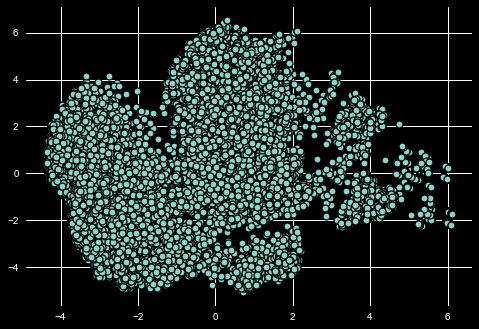

In [94]:
plt.scatter(z_pca[:, 0], z_pca[:, 1],
            linewidths=1.2, edgecolors='black')

In [96]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
df_embed = pd.DataFrame(finalX)
x = 50
m = TSNE(learning_rate='auto', init='pca', n_jobs=-
         1, n_iter=250, n_iter_without_progress=50)
tsne_features = m.fit_transform(df_embed)
df_embed['x'] = tsne_features[:, 0]
df_embed['y'] = tsne_features[:, 1]
sns.scatterplot(x="x", y="y", data=df_embed)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')